<a href="https://colab.research.google.com/github/Ciiku-Kihara/PCA-ANOMALY-DETECTION-AND-ASSOCIATION-ANALYSIS-WITH-R/blob/main/Carrefour_Feature_Selection_and_PCA_project_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carrefour Feature Selection and PCA project with R




## a) Defining the analysis question

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).

I am expected to explore a recent marketing dataset by performing feature selection and make use of dimensionality reduction techniques

## b) Defining the metric for success

Be able to effectively clean the dataset, perform thorough univariate, bivariate and multivariate exploratory data analysis and perform feature selection and dimensionality reduction correctly. I should also be able to gain relevant insights from it.

## c) Understanding the context

Carrefour was launched in the region in 1995 by UAE-based Majid Al Futtaim, which is the exclusive franchisee to operate Carrefour in over 30 countries across the Middle East, Africa, and Asia, and fully owns the operations in the region. Today, Majid Al Futtaim operates over 320 Carrefour stores in 16 countries, serving more than 750,000 customers daily and employing over 37,000 colleagues.

Carrefour operates different store formats, as well as multiple online offerings to meet the growing needs of its diversified customer base. In line with the brand’s commitment to provide the widest range of quality products and value for money, Carrefour offers an unrivalled choice of more than 500,000 food and non-food products, and a locally inspired exemplary customer experience to create great moments for everyone every day.

## d) Recording the experimental design

- Problem Definition
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution (Feature selection and PCA)
- Challenge the Solution
- Follow up Questions

## e) Data Relevance

The dataset adequate to apply various unsupervised learning techniques

# 2. Installing and importing relevant libraries

In [1]:
# Installing the necessary packages

install.packages(c("tidyverse", "data.table", "Hmisc", "moments", "dbscan", "factoextra", "mice", "caret", "devtools", "corrplot", "wskm", "cluster"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SQUAREM’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘lava’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘crosstalk’, ‘promises’, ‘prodlim’, ‘modeltools’, ‘DEoptimR’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘recipes’, ‘pROC’, ‘fpc’




In [2]:
# Installing ggbiplot from github

library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis





✔  checking for file ‘/tmp/Rtmpk1gA91/remotes3b32d7c2e4/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Loading the libraries

library(tidyverse)
library(data.table)
library(Hmisc)
library(moments)
library(dbscan)
library(factoextra)
library(mice)
library(caret)
library(ggbiplot)
library(corrplot)
library(wskm)
library(cluster)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Welcome! Want to learn more? Se

# 3. Loading and checking the data

In [4]:
# Reading the dataset

pca = read.csv("PCA and feature ranking.csv")

In [5]:
# Loading the first 6 rows of the dataset

head(pca)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [6]:
# Obtaining the dimensions of the dataset

dim(pca)

# The dataset has 1000 rows and 16 columns

[1] 1000   16

In [7]:
# Getting the column names

colnames(pca)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

In [8]:
# Getting a glimpse of the structure of the dataset

str(pca)

# Of the 16 columns, 1 is integer, 7 are numerical and 8 are character 

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [9]:
# Getting a summary of the numerical columns

num = pca[, c(6,8,12:16)]
summary(num)


   Unit.price         Tax               cogs        gross.margin.percentage
 Min.   :10.08   Min.   : 0.5085   Min.   : 10.17   Min.   :4.762          
 1st Qu.:32.88   1st Qu.: 5.9249   1st Qu.:118.50   1st Qu.:4.762          
 Median :55.23   Median :12.0880   Median :241.76   Median :4.762          
 Mean   :55.67   Mean   :15.3794   Mean   :307.59   Mean   :4.762          
 3rd Qu.:77.94   3rd Qu.:22.4453   3rd Qu.:448.90   3rd Qu.:4.762          
 Max.   :99.96   Max.   :49.6500   Max.   :993.00   Max.   :4.762          
  gross.income         Rating           Total        
 Min.   : 0.5085   Min.   : 4.000   Min.   :  10.68  
 1st Qu.: 5.9249   1st Qu.: 5.500   1st Qu.: 124.42  
 Median :12.0880   Median : 7.000   Median : 253.85  
 Mean   :15.3794   Mean   : 6.973   Mean   : 322.97  
 3rd Qu.:22.4453   3rd Qu.: 8.500   3rd Qu.: 471.35  
 Max.   :49.6500   Max.   :10.000   Max.   :1042.65  

# 4. External data source validation 

The data can be validated by clicking on the following link: https://www.kaggle.com/aungpyaeap/supermarket-sales

# 5. Data cleaning

In [ ]:
# Checking for duplicates

sum(duplicated(pca))

# There are no duplicated records in the dataset

[1] 0

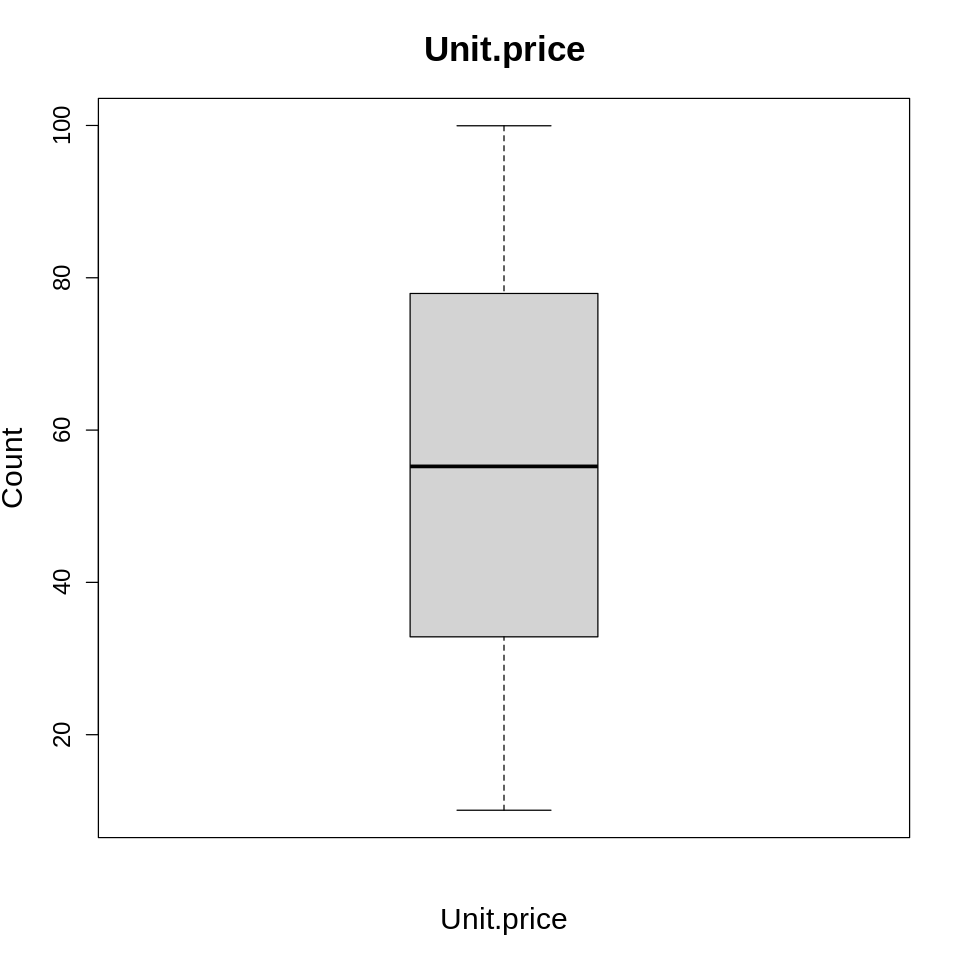

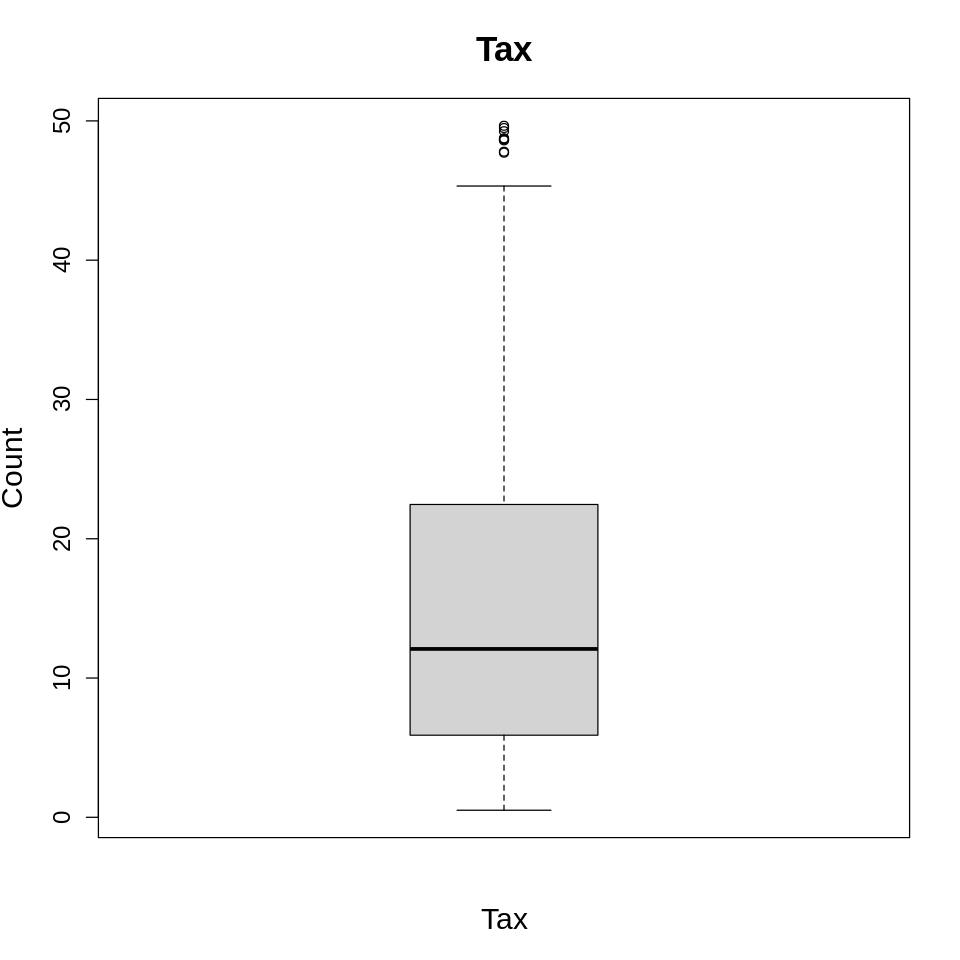

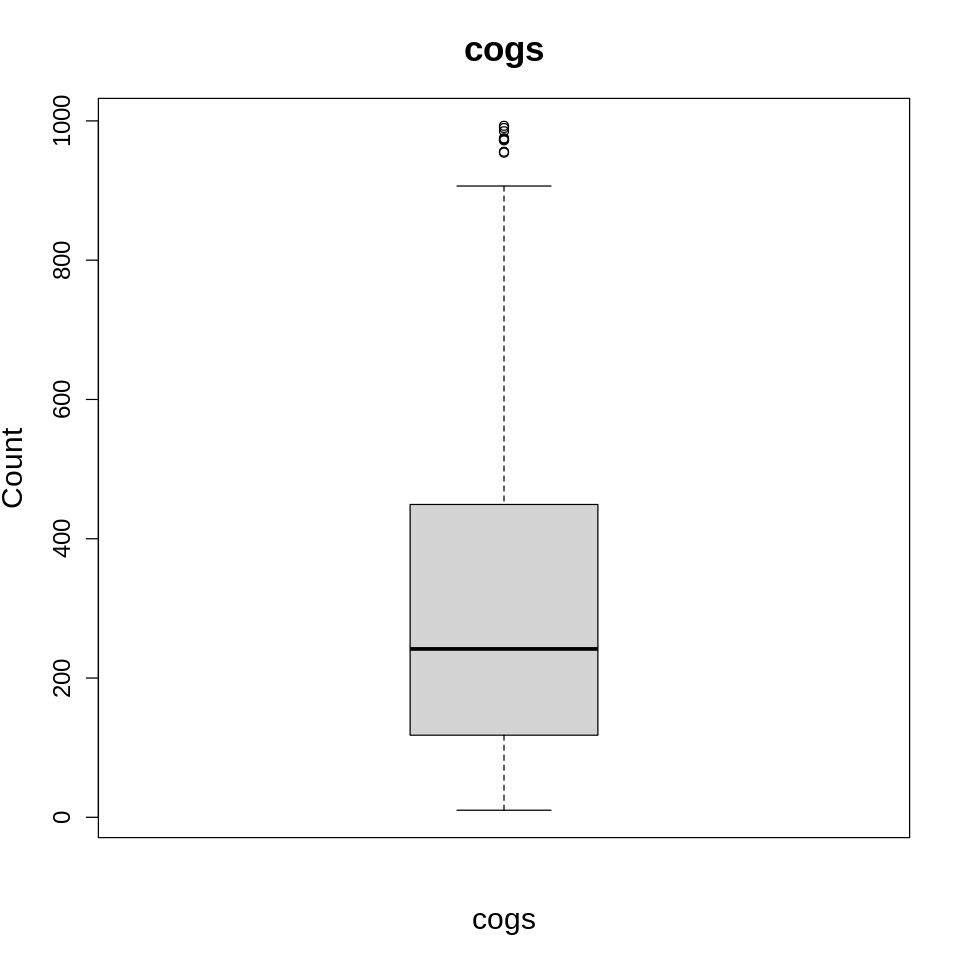

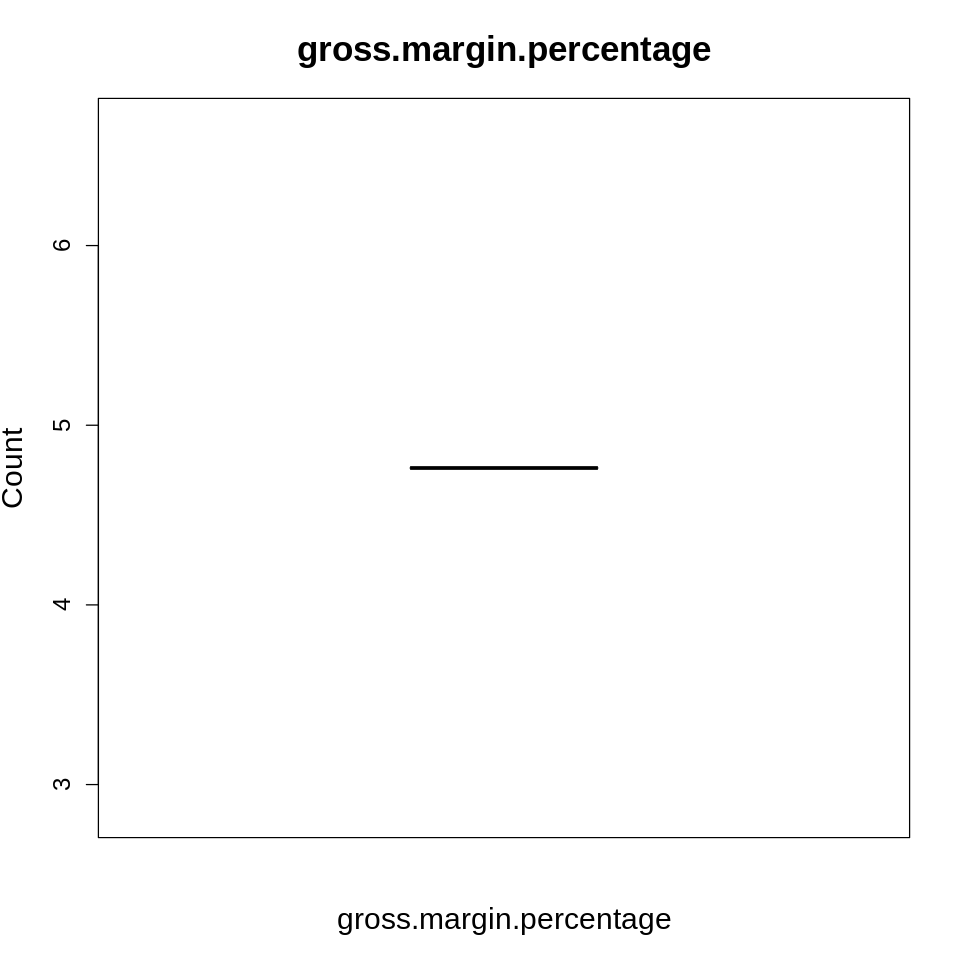

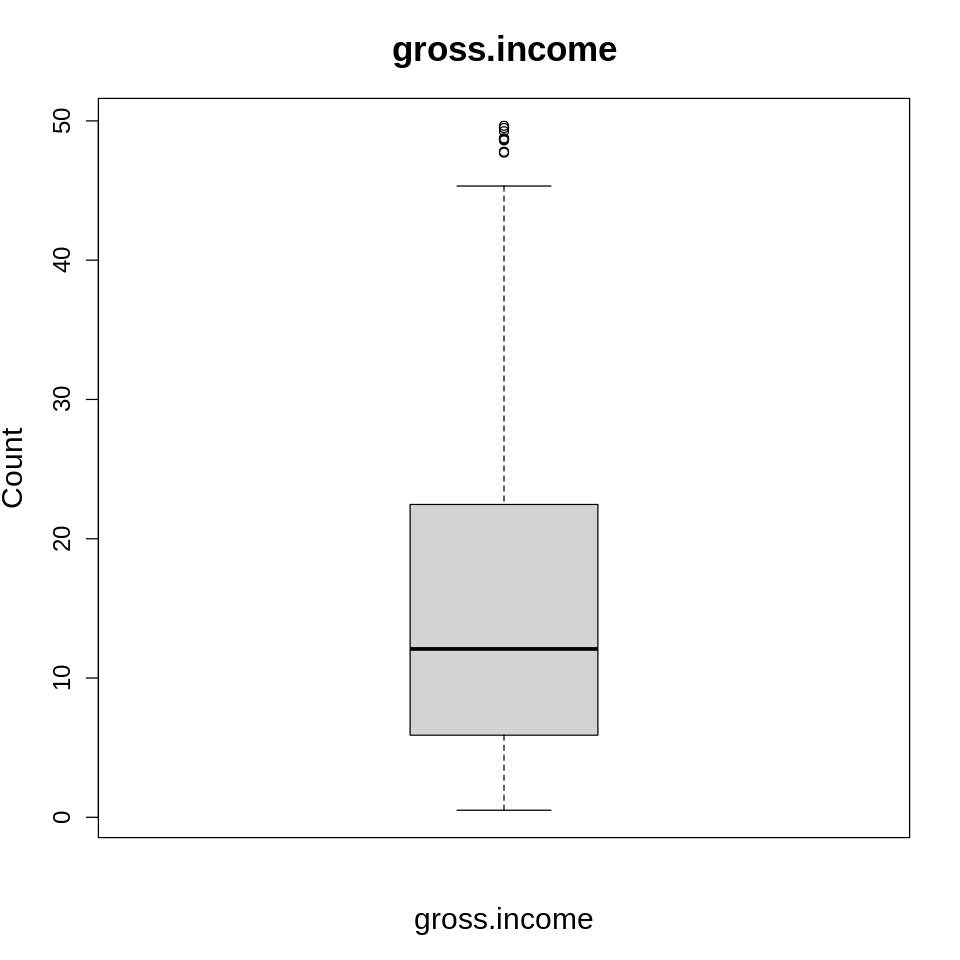

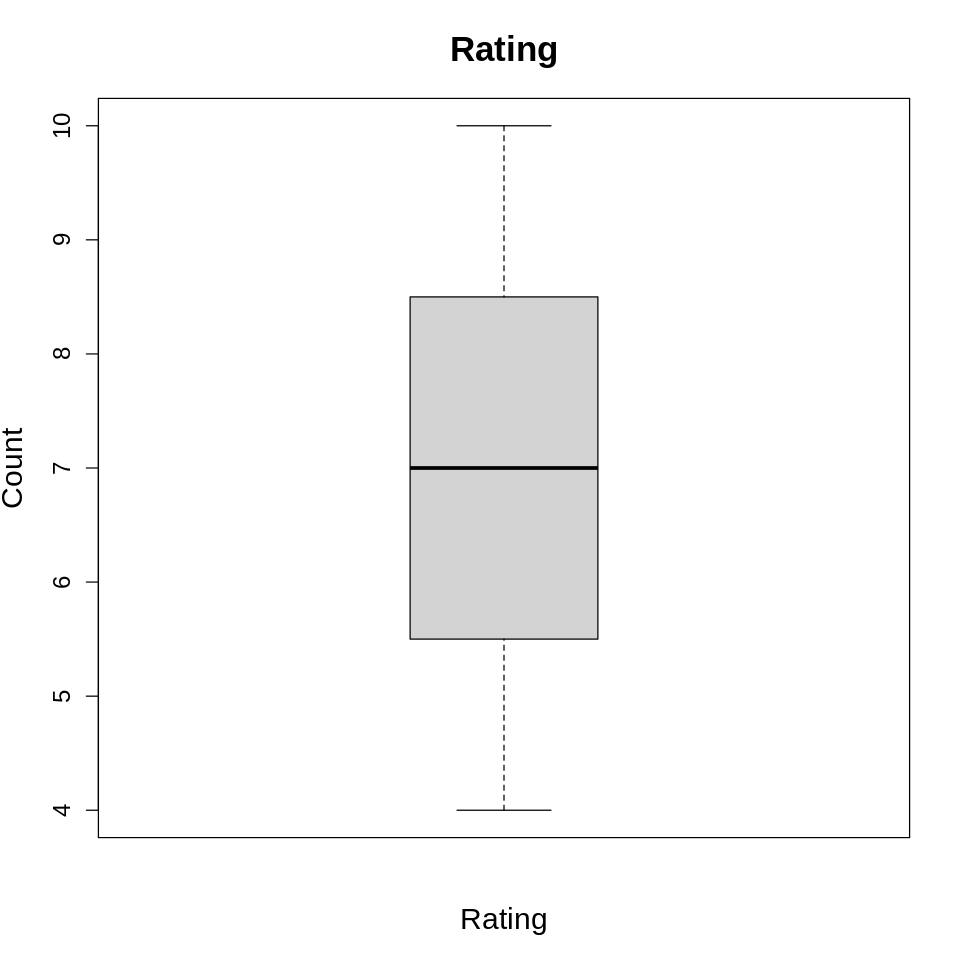

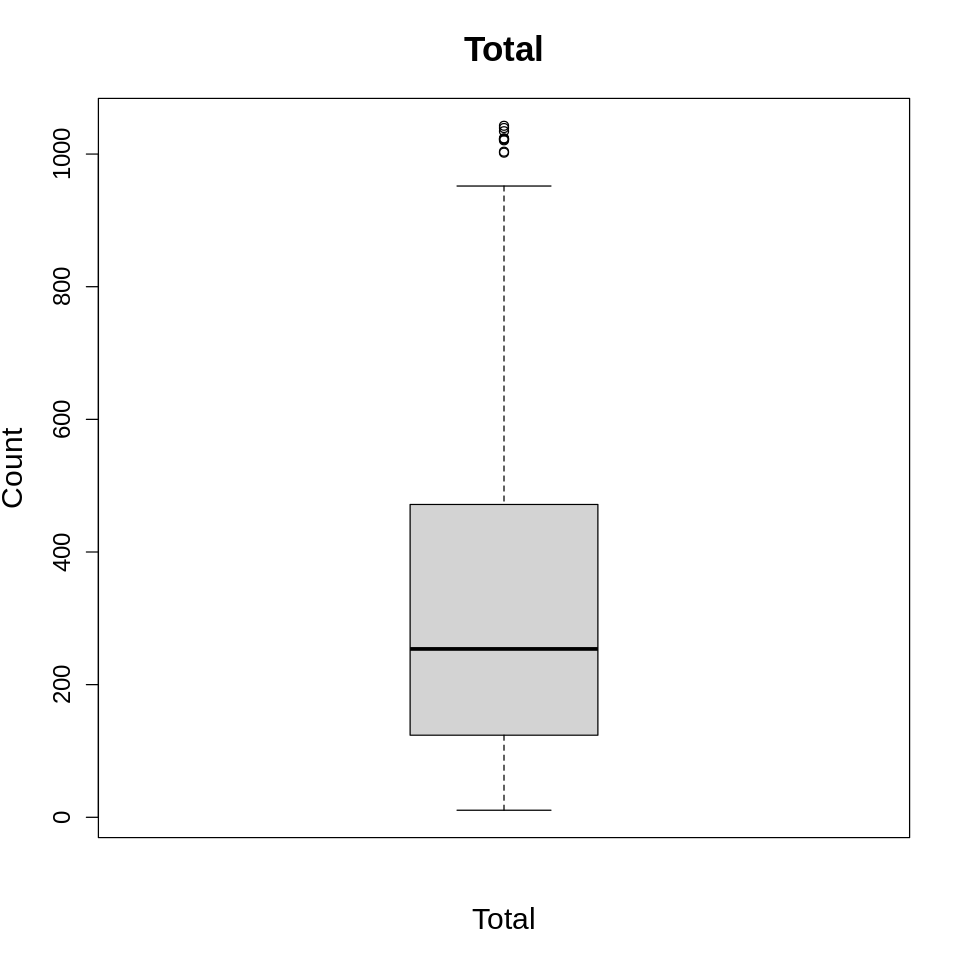

In [ ]:
# Checking for outliers in the numerical columns using boxplots

for (i in 1:length(num)) {
  options(repr.plot.width = 8, repr.plot.height = 8)
  boxplot(num[,i], main= names(num[i]), xlab = names(num[i]), ylab = "Count",
  boxwex=0.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)
  cat("\n", "\n")
}

# There were outliers in the total, gross income, cogs and tax columns but I will 
# not remove the outliers. The gross margin percentage boxplot looks the way it 
# does because it has the same value recorded across all observations

In [ ]:
# Checking for null values

colSums(is.na(pca))

# There are no null values in the dataset

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [10]:
# Dropping the Invoice ID, Date and time columns because I may not need them for this analysis

df = select(pca, -c(Invoice.ID, Date, Time ))
head(df)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


# 6. Exploratory Data Analysis

## Univariate Analysis

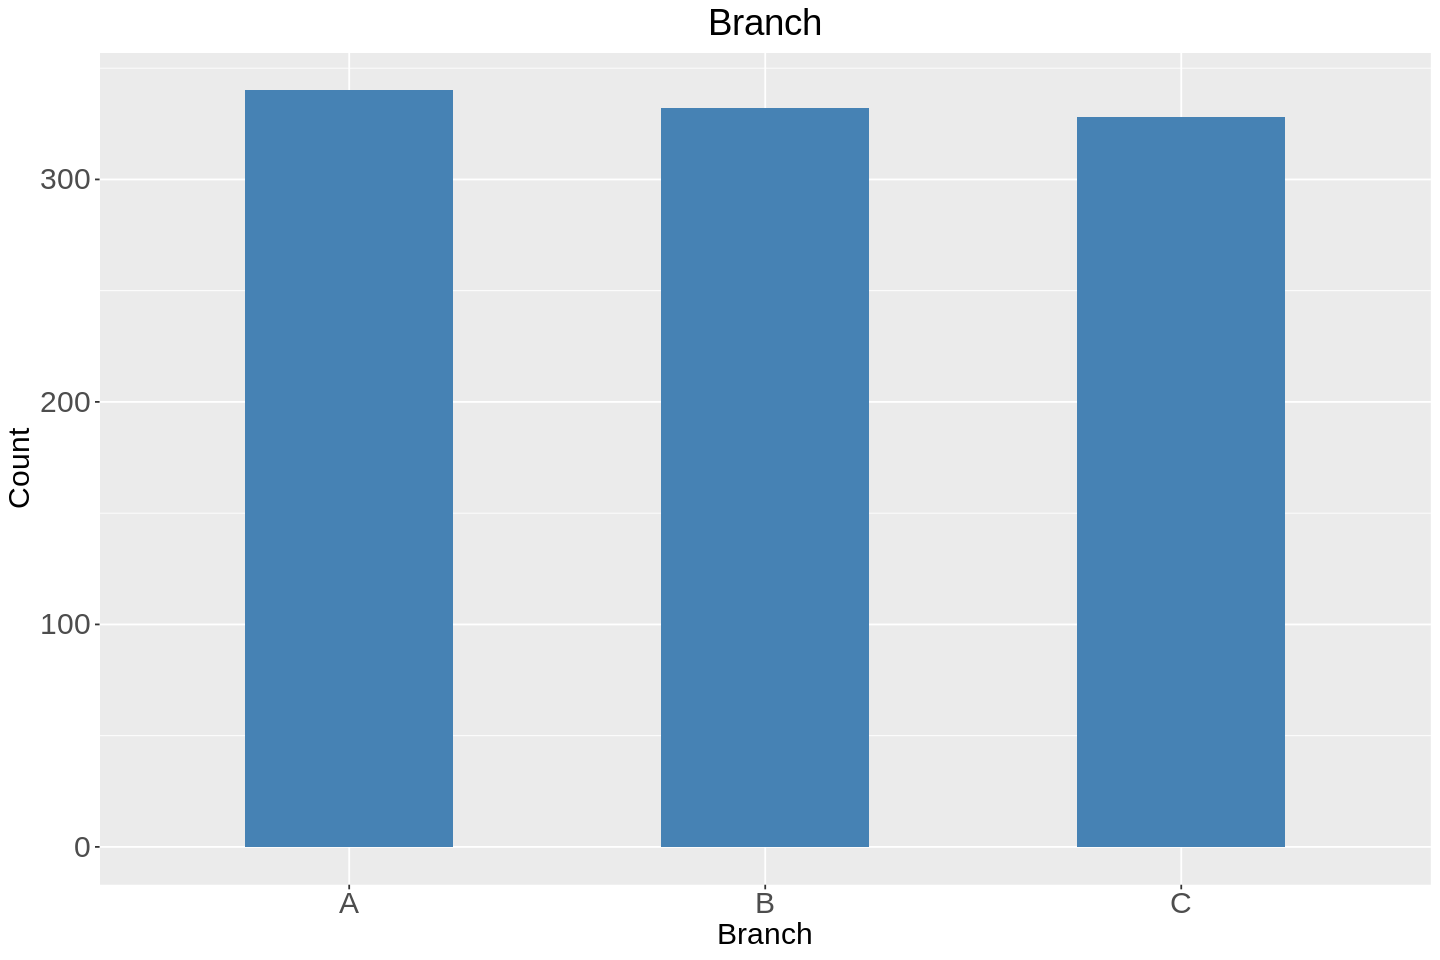

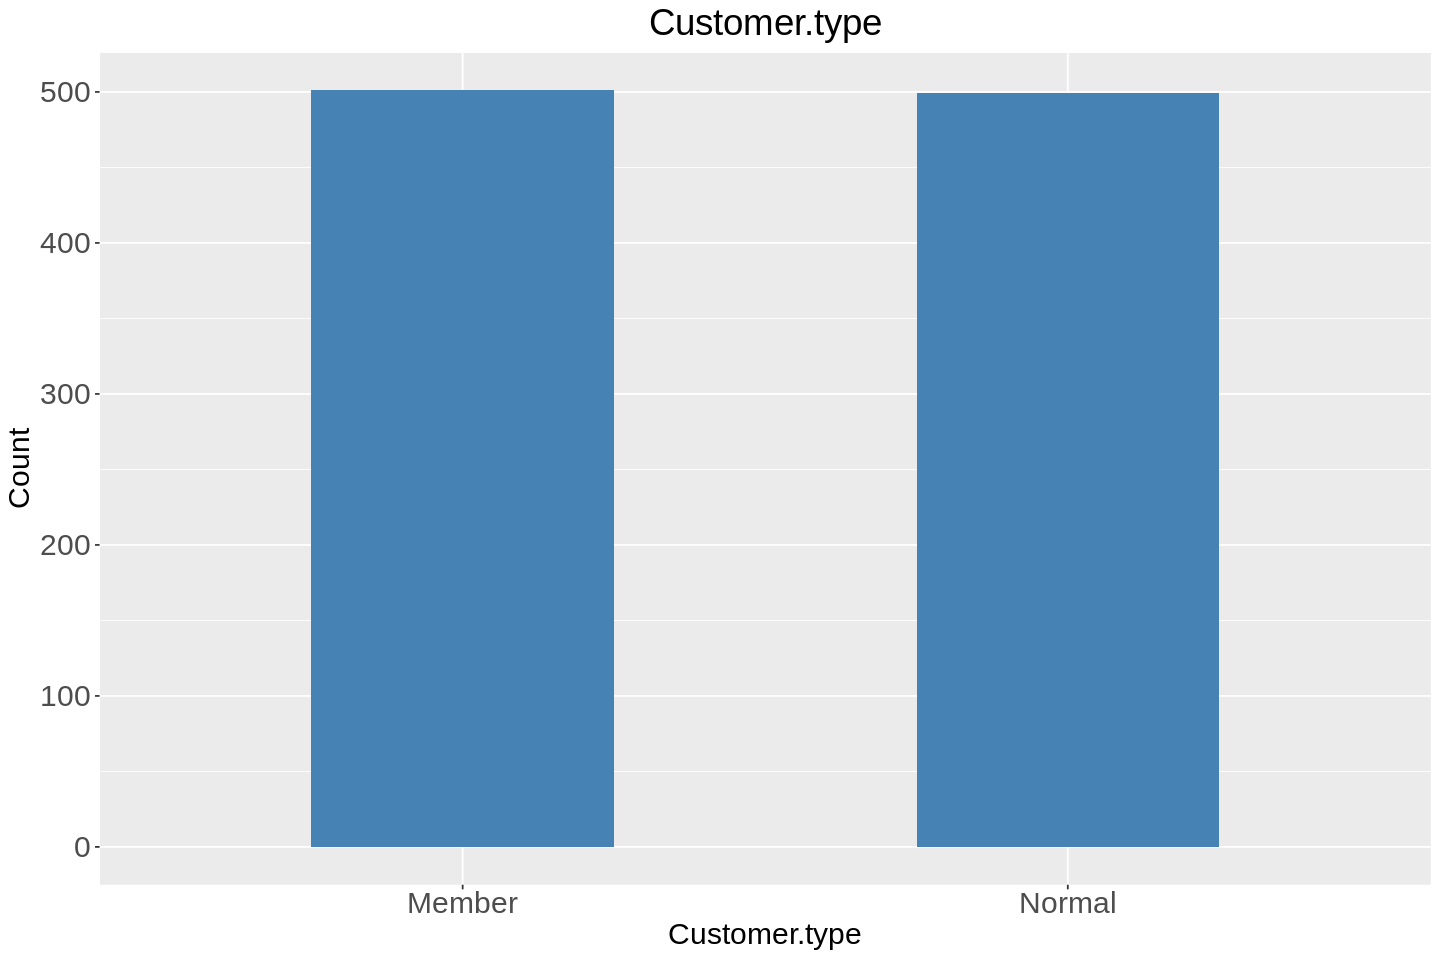

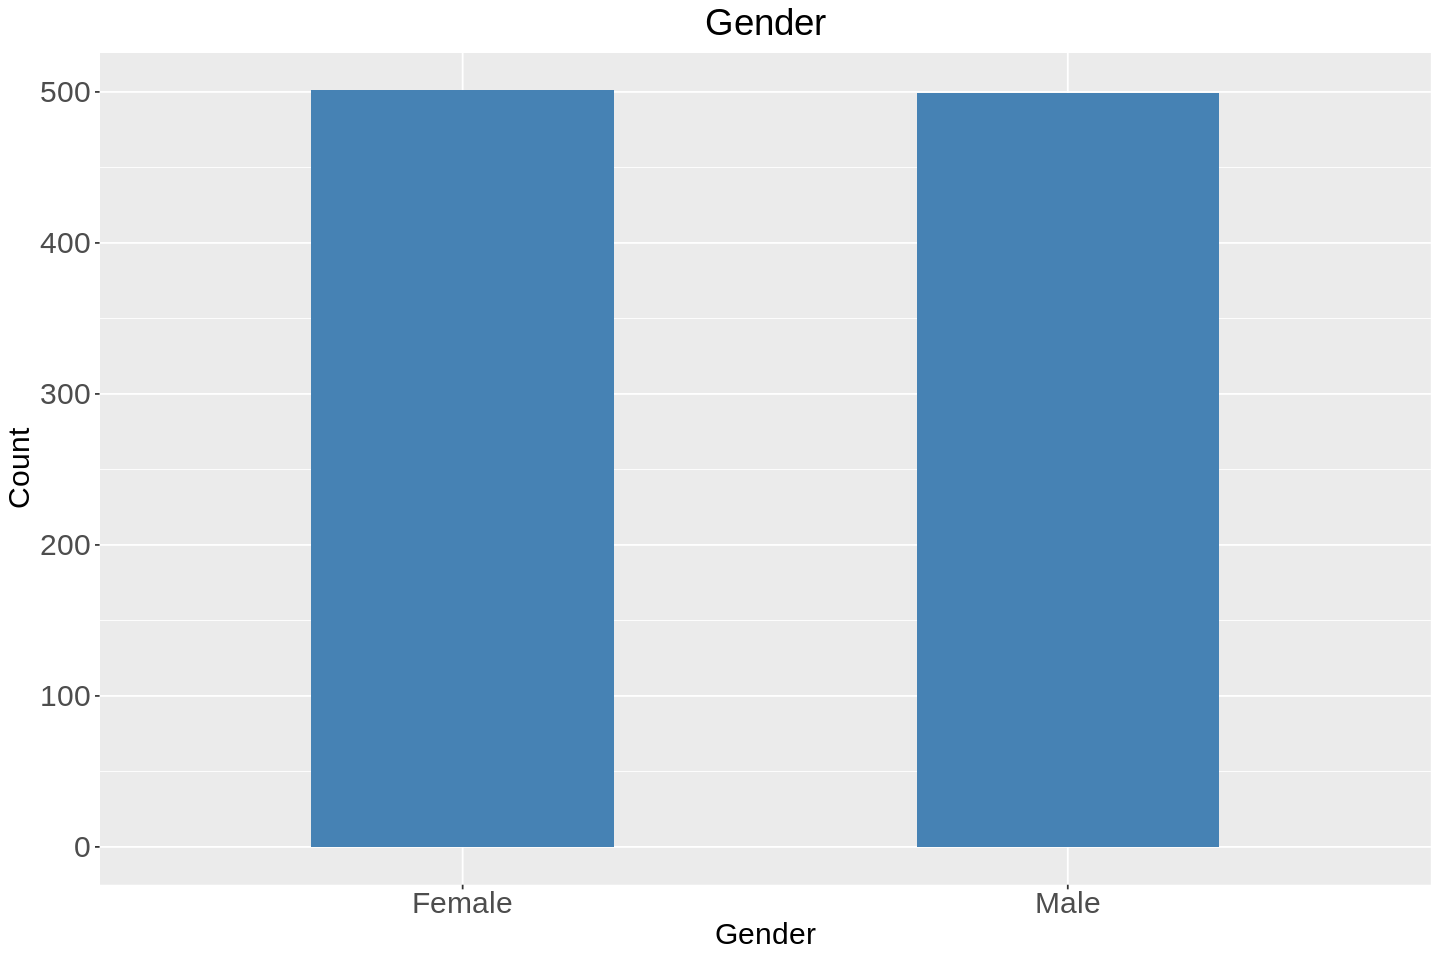

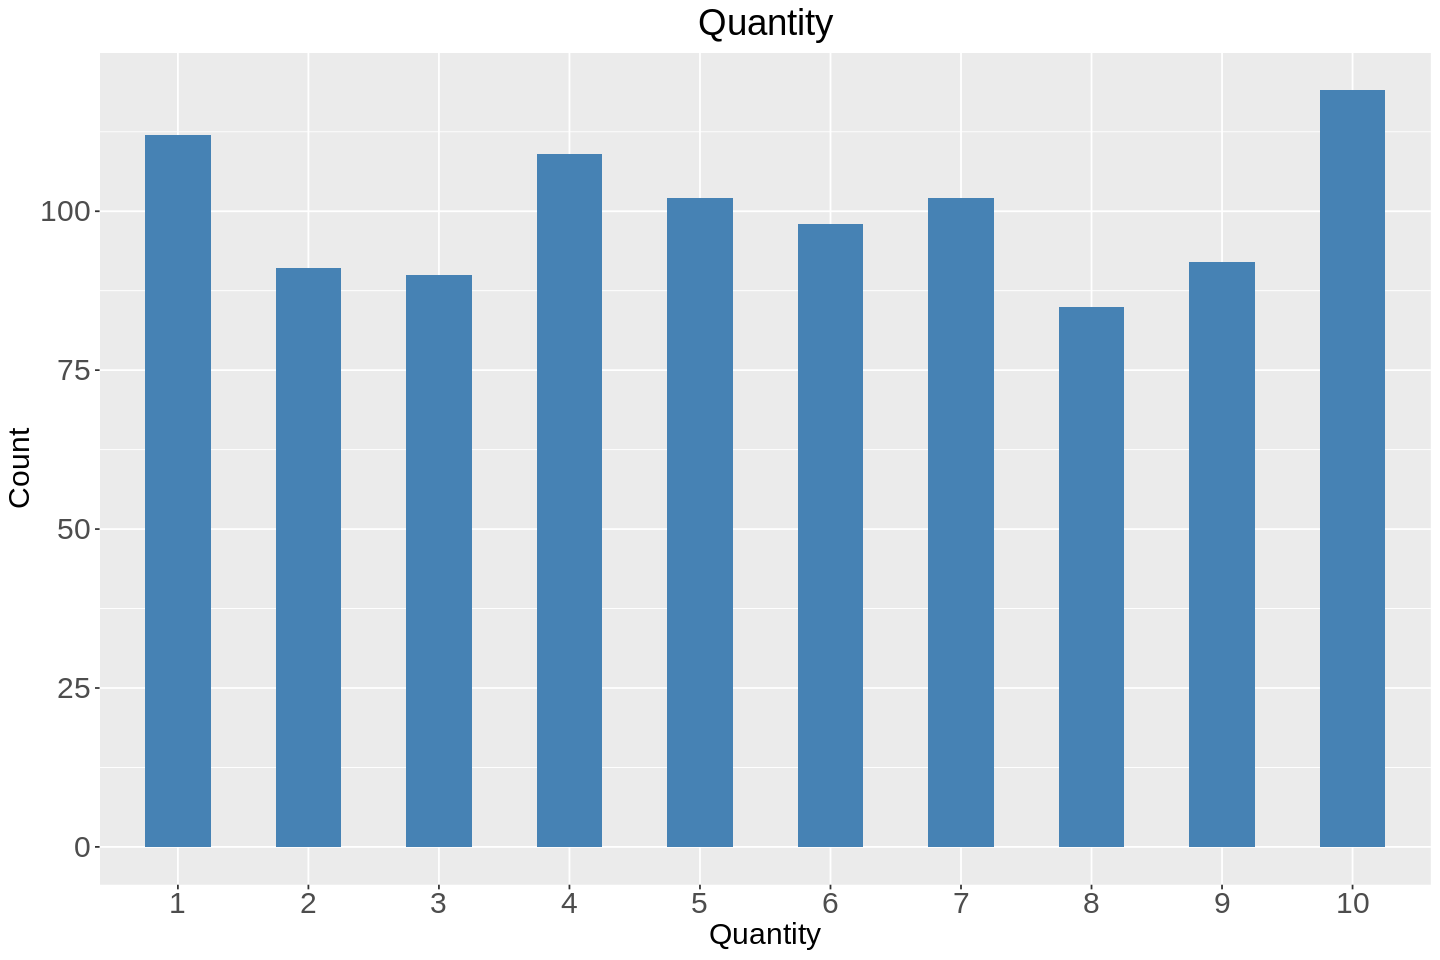

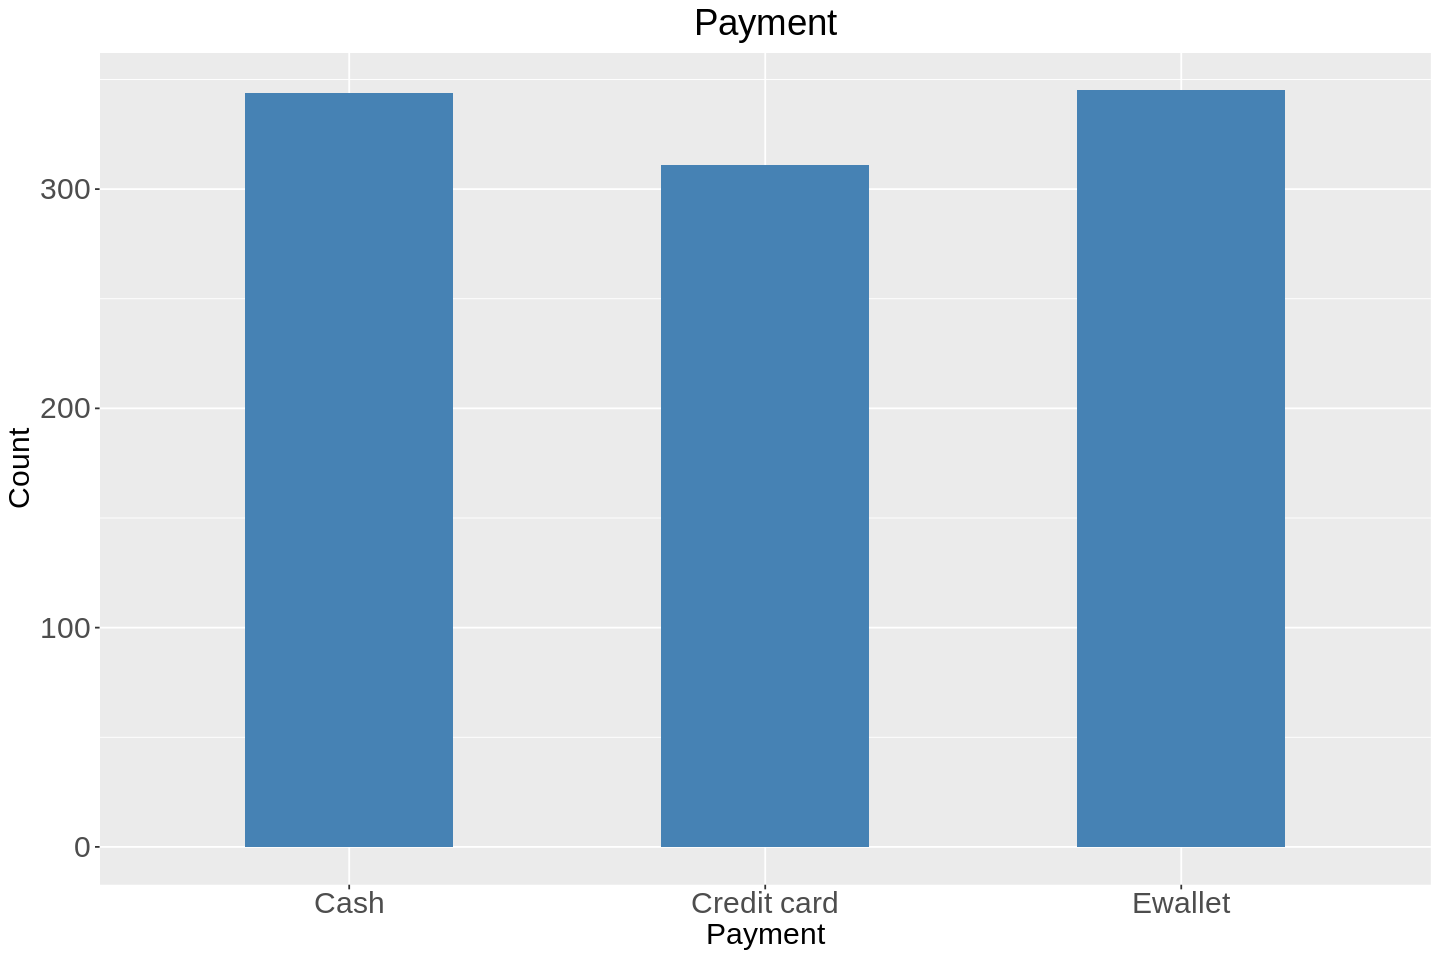

In [11]:
# Univariate analysis for the categorical variables using countplots

cat = df[, c(1:3,6,8)]

for (i in 1:length(cat)) {
  options(repr.plot.width = 12, repr.plot.height = 8)
  print(ggplot(cat, aes(x = factor(cat[,i]))) +
  geom_bar(fill = "steelblue", width = 0.5) +
  labs(title = names(cat[i]), x = names(cat[i]), y = "Count") +
  theme(axis.text = element_text(size=18),
        axis.title = element_text(size = 18),
        plot.title = element_text(hjust = 0.5, size = 22)))
  cat("\n", "\n")
}

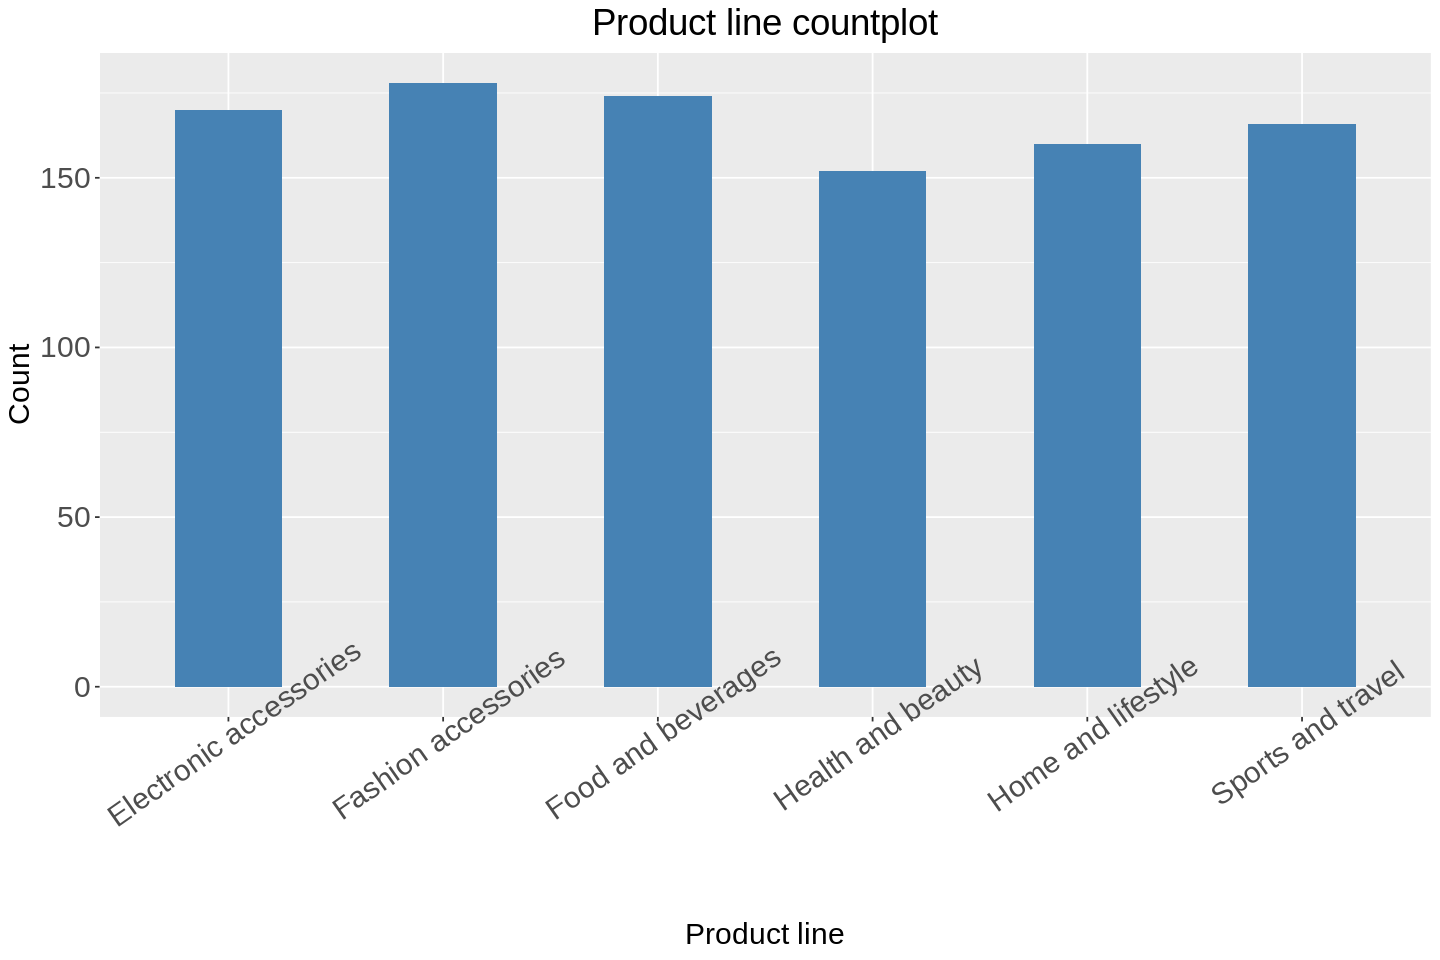

In [12]:
# Product line countplot

options(repr.plot.width = 12, repr.plot.height = 8)
print(ggplot(df, aes(x = factor(Product.line))) +
geom_bar(fill = "steelblue", width = 0.5) +
labs(title = "Product line countplot", x = "Product line", y = "Count") +
theme(axis.text.x = element_text(size=18, angle = 35),
      axis.text.y = element_text(size=18),
      axis.title = element_text(size = 18),
      plot.title = element_text(hjust = 0.5, size = 22)))



In [13]:
# Checking the actual number of males and females

table(df$Gender)


Female   Male 
   501    499 

In [14]:
# Frequency table of payment

table(df$Payment)


       Cash Credit card     Ewallet 
        344         311         345 

In [15]:
# Frequency table of customer type

table(df$Customer.type)


Member Normal 
   501    499 

From the above countplots, we can see that:
- Fashion accesories were bought the most while health and beauty products were bought the least.
- Most purchases were made from branch A than B or C.
- The number of member customers is approximately equal to the number of normal(non-member) customers.
- The number of males and females who made purchases is approximately the same.
- Most customers purchased 10 items.
- Most customers used e-wallet or cash to make payments.

In [16]:
# Checking the column names of the numerical columns

colnames(num)

[1] "Unit.price"              "Tax"                    
[3] "cogs"                    "gross.margin.percentage"
[5] "gross.income"            "Rating"                 
[7] "Total"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



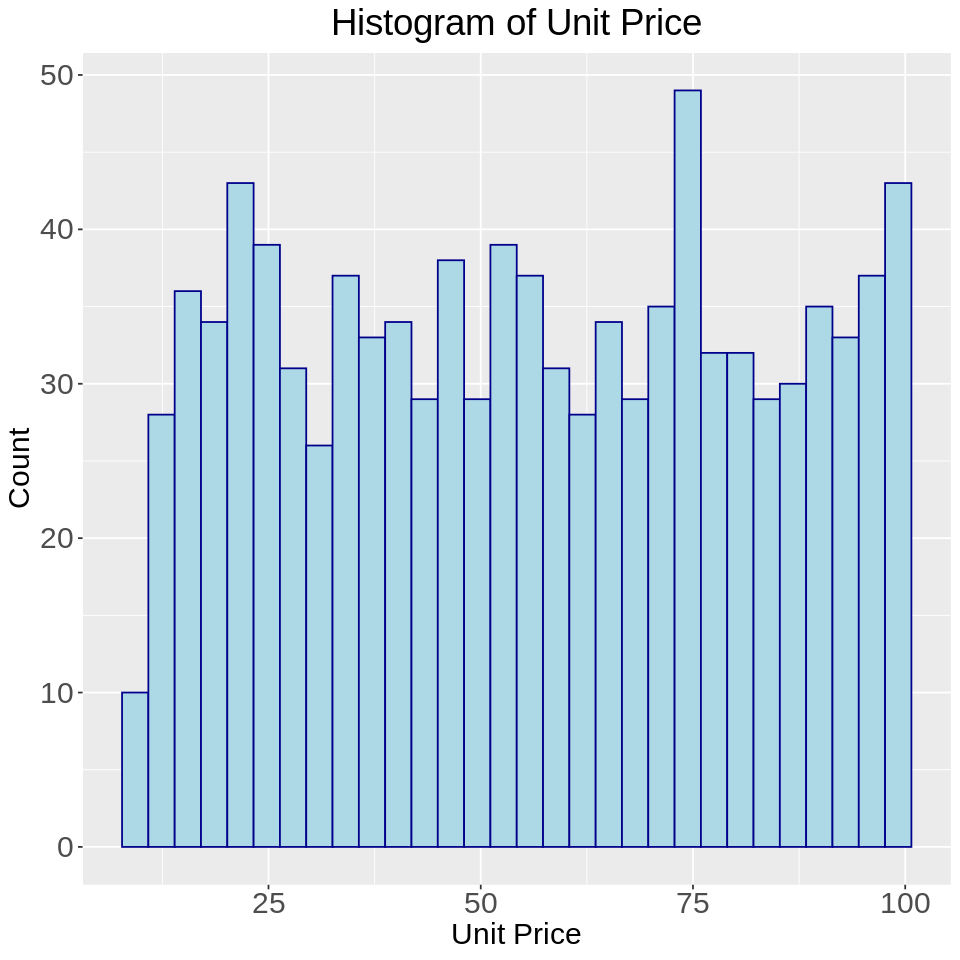

In [17]:
# Univariate analysis for the numeric columns
# Analysis for the unit price column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Unit.price))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Unit Price", x = "Unit Price", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [18]:
# Measures of dispersion

cat("Skewness:", skewness(df$Unit.price), "\n")
cat("Kurtosis", kurtosis(df$Unit.price), "\n")
cat("Standard Deviation:", sd(df$Unit.price), "\n")
cat("Coefficient of variation:", sd(df$Unit.price)/ mean(df$Unit.price))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Unit.price)

# The data is more or less normally distributed and is slightly leptokurtic. 
# There is low variance between values
# Minimum value is 10.08 and maximum value is 99.96
# The mean is 55.67

Skewness: 0.007066827 
Kurtosis 1.781499 
Standard Deviation: 26.49463 
Coefficient of variation: 0.4759047
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.08   32.88   55.23   55.67   77.94   99.96 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



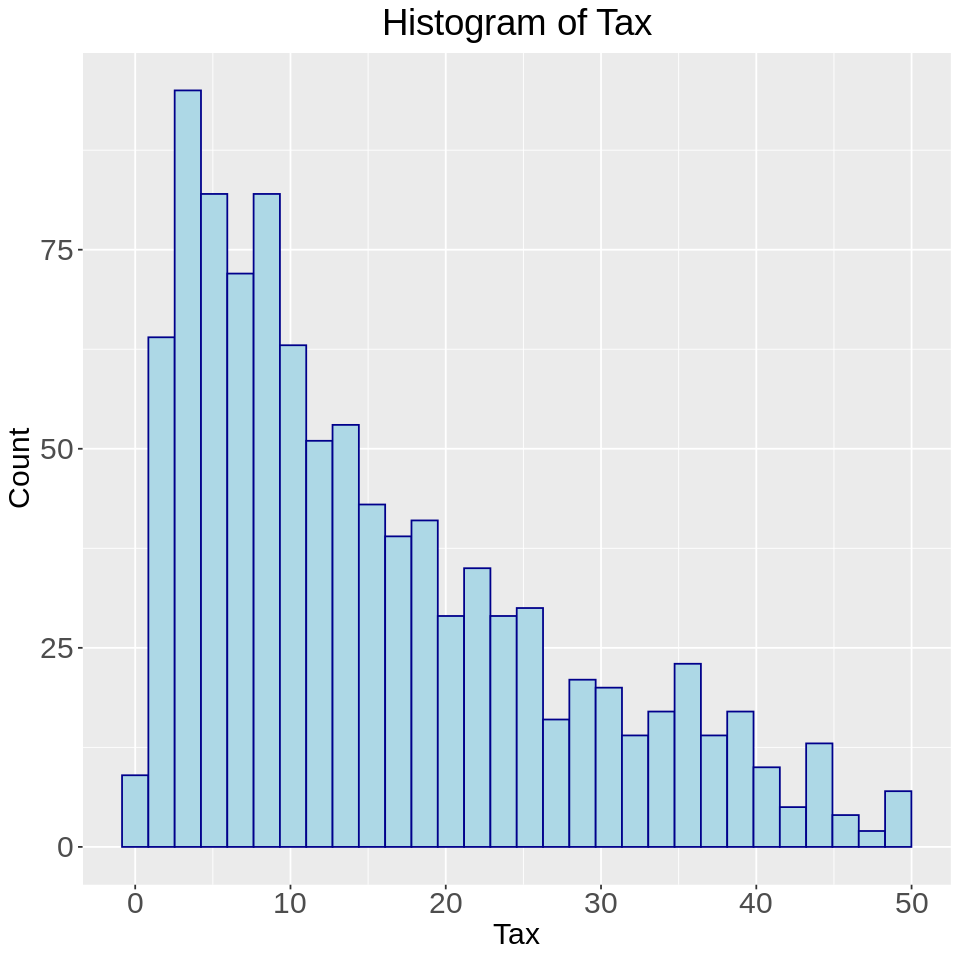

In [19]:
# Analysis for the tax column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Tax))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Tax", x = "Tax", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [20]:
# Measures of dispersion

cat("Skewness:", skewness(df$Tax), "\n")
cat("Kurtosis", kurtosis(df$Tax), "\n")
cat("Standard Deviation:", sd(df$Tax), "\n")
cat("Coefficient of variation:", sd(df$Tax)/ mean(df$Tax))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Tax)

# The data is skewed to the right and is leptokurtic. There is low variance between values
# Minimum value is 0.5085 and maximum value is 49.65
# The mean is 15.3794.

Skewness: 0.8912304 
Kurtosis 2.91253 
Standard Deviation: 11.70883 
Coefficient of variation: 0.7613333
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5085  5.9249 12.0880 15.3794 22.4453 49.6500 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



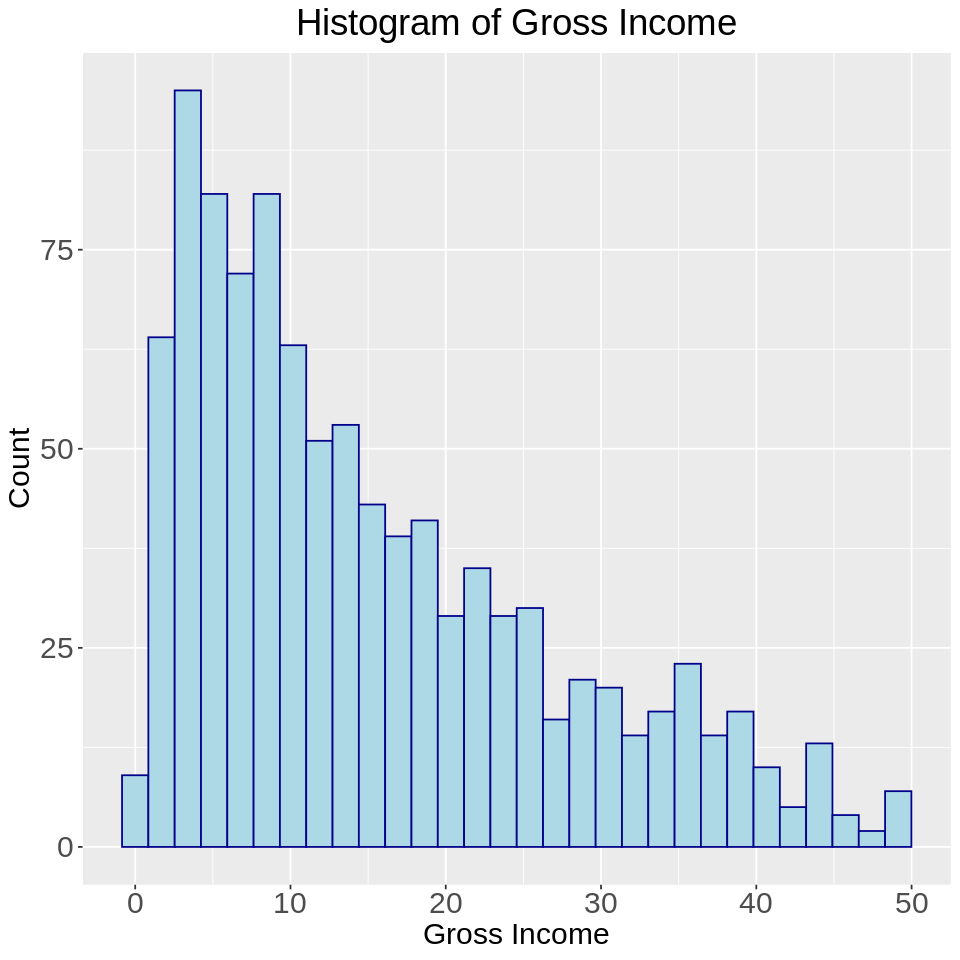

In [21]:
# Analysis for the gross income column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = gross.income))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Gross Income", x = "Gross Income", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [22]:
# Measures of dispersion

cat("Skewness:", skewness(df$gross.income), "\n")
cat("Kurtosis", kurtosis(df$gross.income), "\n")
cat("Standard Deviation:", sd(df$gross.income), "\n")
cat("Coefficient of variation:", sd(df$gross.income)/ mean(df$gross.income))
cat("\n", "\n")

# Measures of central tendancy

summary(df$gross.income)

# The data is skewed to the right and is leptokurtic. There is low variance between values
# Minimum value is 0.5085 and maximum value is 49.65
# The mean is 15.3794.

Skewness: 0.8912304 
Kurtosis 2.91253 
Standard Deviation: 11.70883 
Coefficient of variation: 0.7613333
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5085  5.9249 12.0880 15.3794 22.4453 49.6500 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



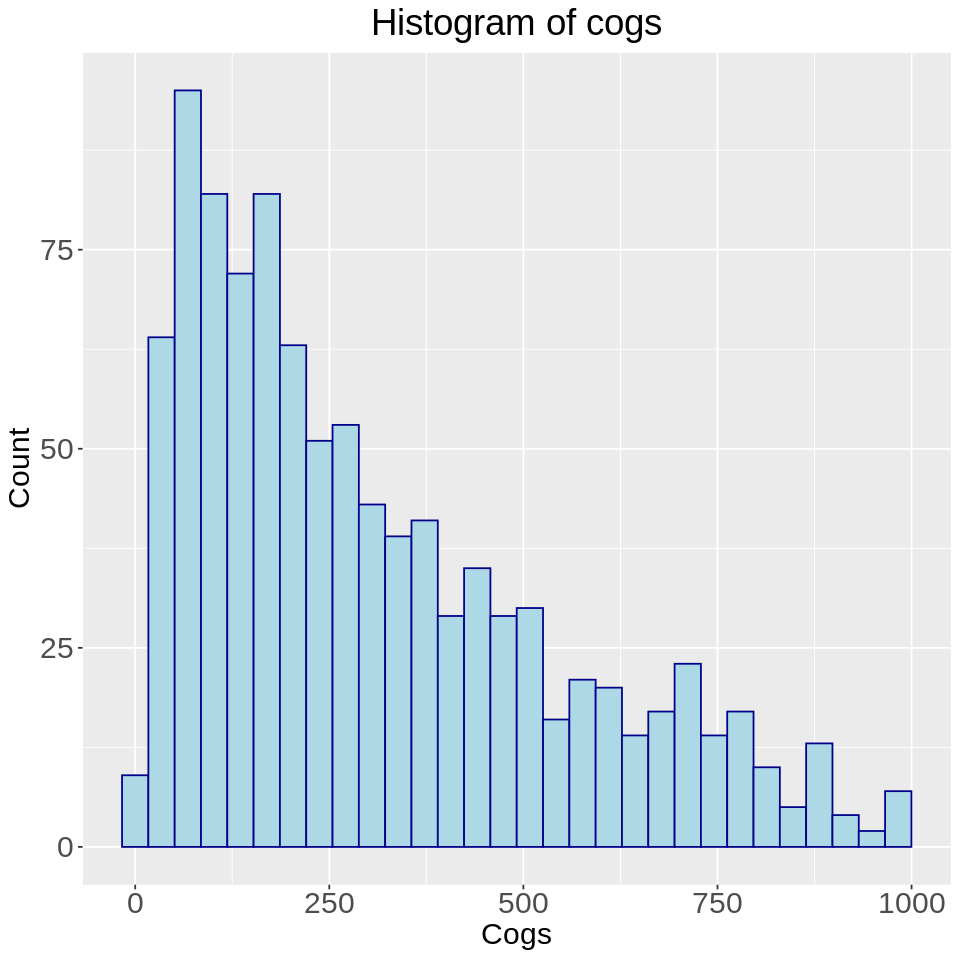

In [23]:
# Analysis for the cogs (Cost of Goods) column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = cogs))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of cogs", x = "Cogs", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [24]:
# Measures of dispersion

cat("Skewness:", skewness(df$cogs), "\n")
cat("Kurtosis", kurtosis(df$cogs), "\n")
cat("Standard Deviation:", sd(df$cogs), "\n")
cat("Coefficient of variation:", sd(df$cogs)/ mean(df$cogs))
cat("\n", "\n")

# Measures of central tendancy

summary(df$cogs)

# The data is skewed to the right and is leptokurtic. There is low variance between values
# Minimum value is 10.17 and maximum value is 993
# The mean is 307.59

Skewness: 0.8912304 
Kurtosis 2.91253 
Standard Deviation: 234.1765 
Coefficient of variation: 0.7613333
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.17  118.50  241.76  307.59  448.90  993.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



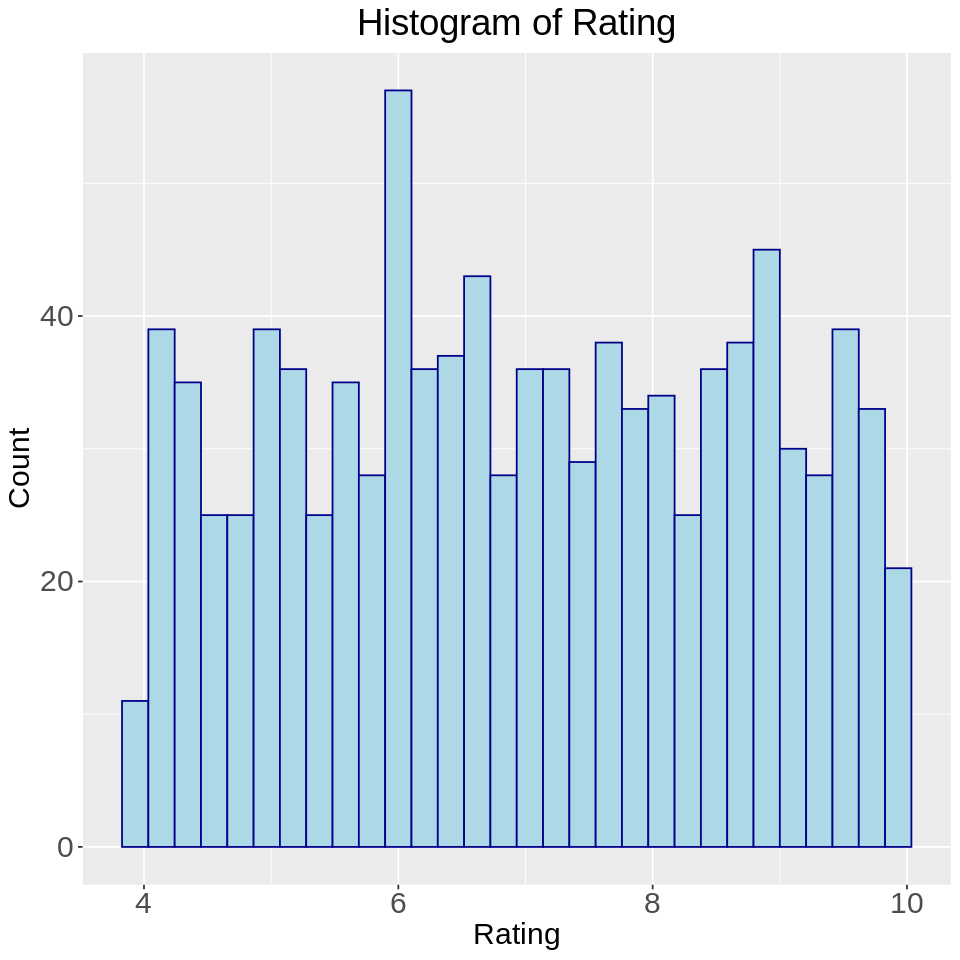

In [25]:
# Analysis for the rating column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Rating))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Rating", x = "Rating", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [26]:
# Measures of dispersion

cat("Skewness:", skewness(df$Rating), "\n")
cat("Kurtosis", kurtosis(df$Rating), "\n")
cat("Standard Deviation:", sd(df$Rating), "\n")
cat("Coefficient of variation:", sd(df$Rating)/ mean(df$Rating))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Rating)

# The data is more or less normally distributed and is leptokurtic. 
# There is low variance between values
# Minimum value is 4 and maximum value is 10
# The mean is 6.973

Skewness: 0.008996129 
Kurtosis 1.848169 
Standard Deviation: 1.71858 
Coefficient of variation: 0.2464727
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.500   7.000   6.973   8.500  10.000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



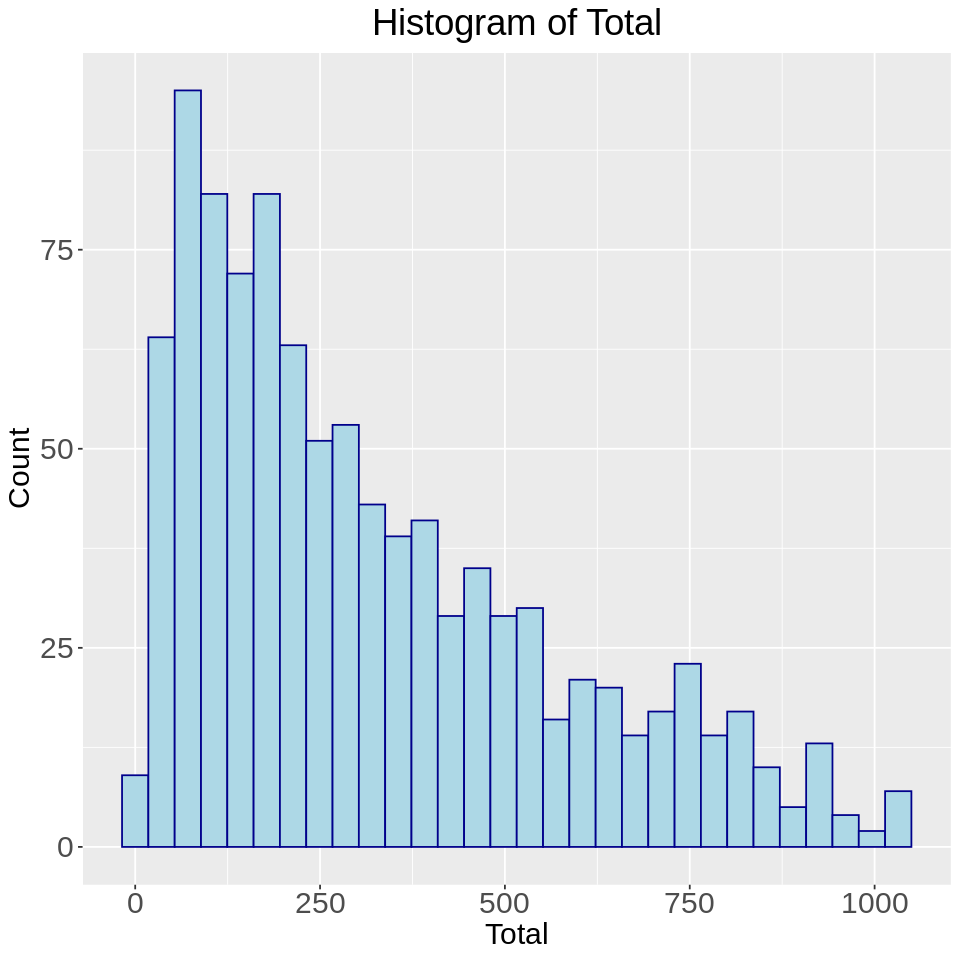

In [27]:
# Analysis for the Total column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Total))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Total", x = "Total", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [28]:
# Measures of dispersion

cat("Skewness:", skewness(df$Total), "\n")
cat("Kurtosis", kurtosis(df$Total), "\n")
cat("Standard Deviation:", sd(df$Total), "\n")
cat("Coefficient of variation:", sd(df$Total)/ mean(df$Total))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Total)

# The data is skewed to the right and is leptokurtic. There is low variance between values
# Minimum value is 10.68 and maximum value is 1042.65
# The mean is 322.97

Skewness: 0.8912304 
Kurtosis 2.91253 
Standard Deviation: 245.8853 
Coefficient of variation: 0.7613333
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.68  124.42  253.85  322.97  471.35 1042.65 

In [29]:
# Frequency table of gross margin percentage

table(df$gross.margin.percentage)

# All 1000 observations have 4.62 entered under the column name.


4.761904762 
       1000 

## Bivariate Analysis

In [30]:
# Checking the structure of the dataset

str(df)

'data.frame':	1000 obs. of  13 variables:
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...


In [31]:
# Conveting the categorical columns to factors

df[, c(1:4,6,8)] <- lapply(df[, c(1:4,6,8)], as.factor)

# Checking the structure of the dataset

str(df)

'data.frame':	1000 obs. of  13 variables:
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : Factor w/ 10 levels "1","2","3","4",..: 7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total  

In [32]:
# Installing GGally package in order to plot the pairplot

install.packages("GGally")
library("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



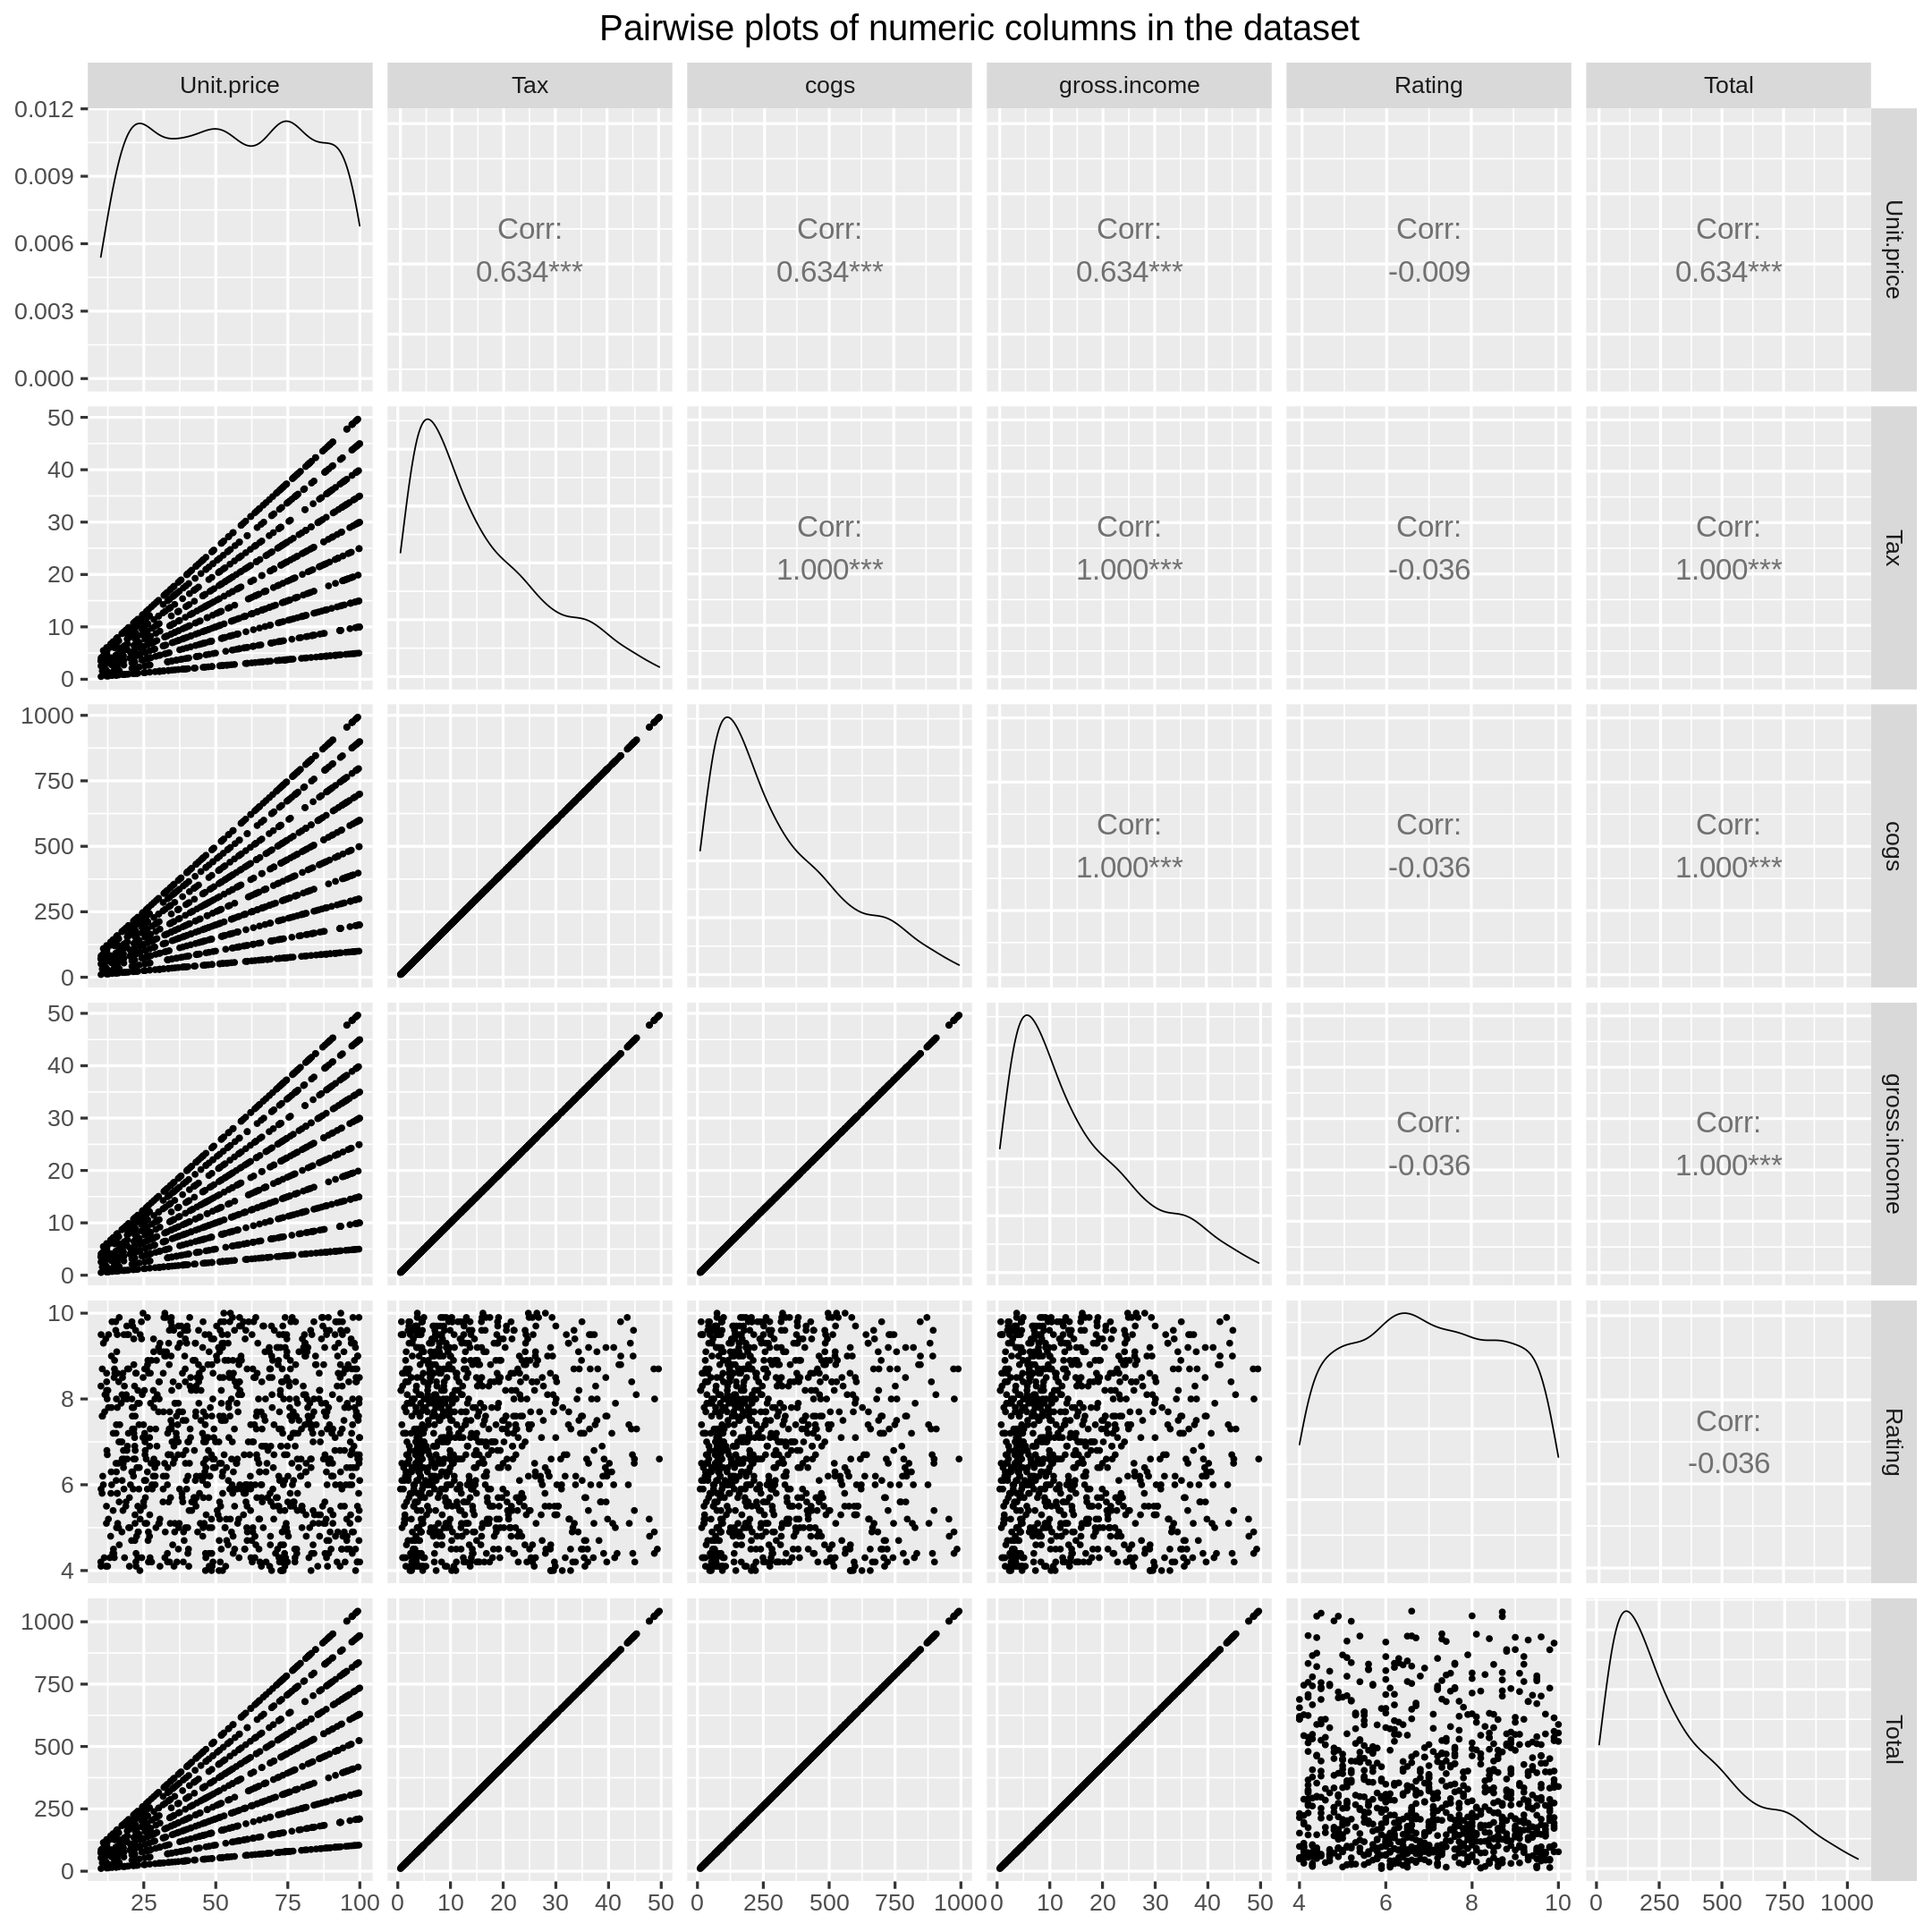

In [33]:
# Plotting pair plots for numeric columns

options(repr.plot.width = 18, repr.plot.height = 18)
ggpairs(df[, c(5,7,9,11:13)], upper = list(continuous = wrap("cor", size = 7))) + 
labs(title = "Pairwise plots of numeric columns in the dataset") +
    theme_grey(base_size = 20) +
    theme(plot.title = element_text(hjust = 0.5))

- There is a perfect positive correlation between tax & cogs, tax & gross income, gross income & cogs, total & tax, total & cogs and total & gross income.

- There is a relatively strong correlation between Unit price and tax, cogs and gross income seperately

In [34]:
# Checking the column names of the categorical columns

colnames(cat)

[1] "Branch"        "Customer.type" "Gender"        "Quantity"     
[5] "Payment"

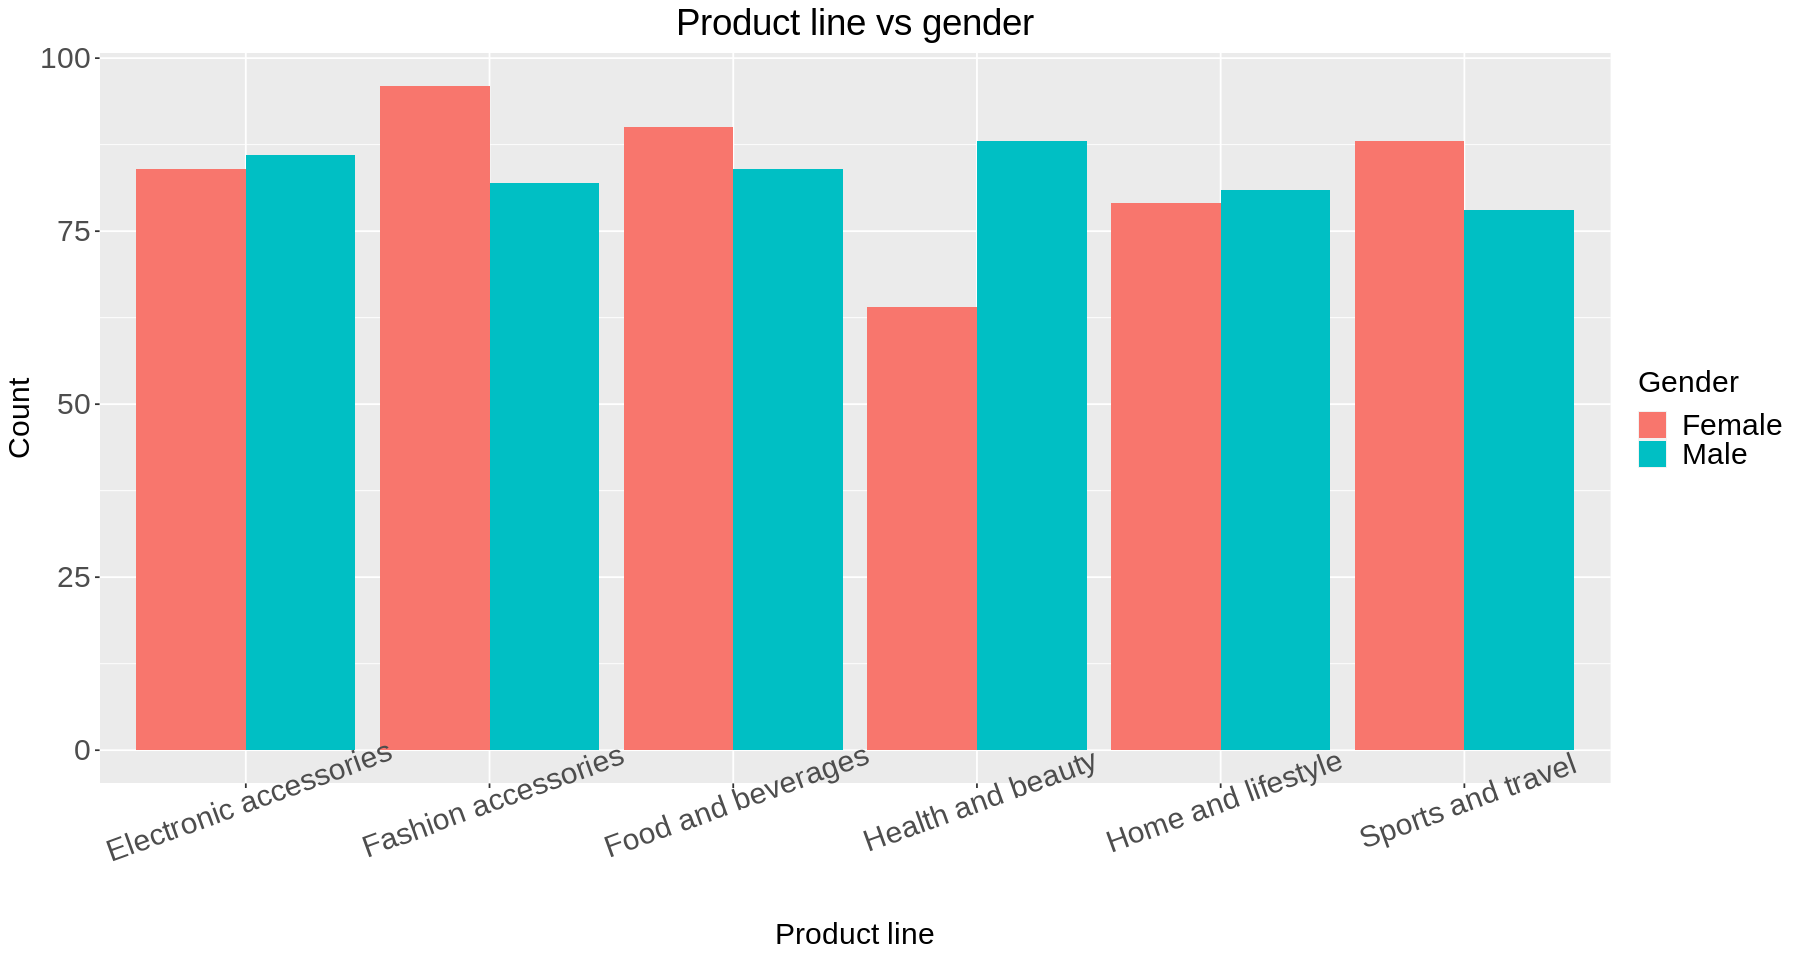

In [35]:
# Relationship between gender and product line

options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(df, aes(x = Product.line, fill = Gender)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Product line vs gender", x = "Product line", y = "Count") +
    theme(axis.text.x = element_text(size=18, angle = 20),
          axis.text.y = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

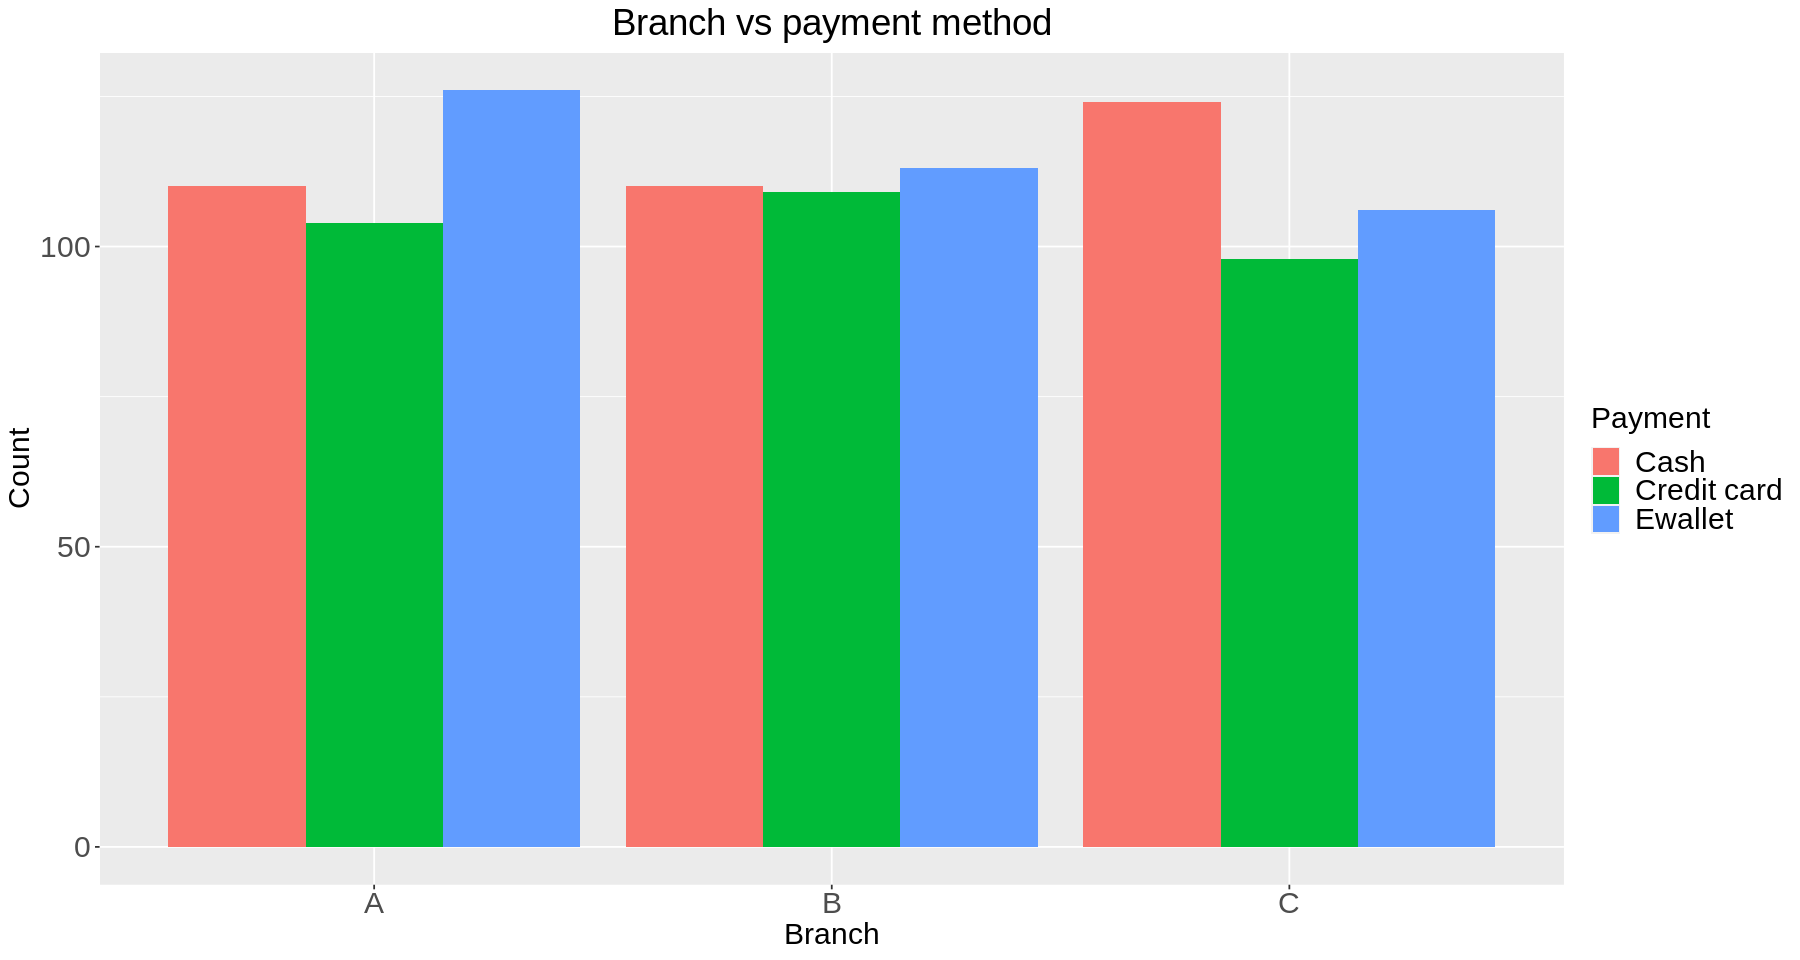

In [36]:
# Relationship between payment method and branch

options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(df, aes(x = Branch, fill = Payment)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Branch vs payment method", x = "Branch", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

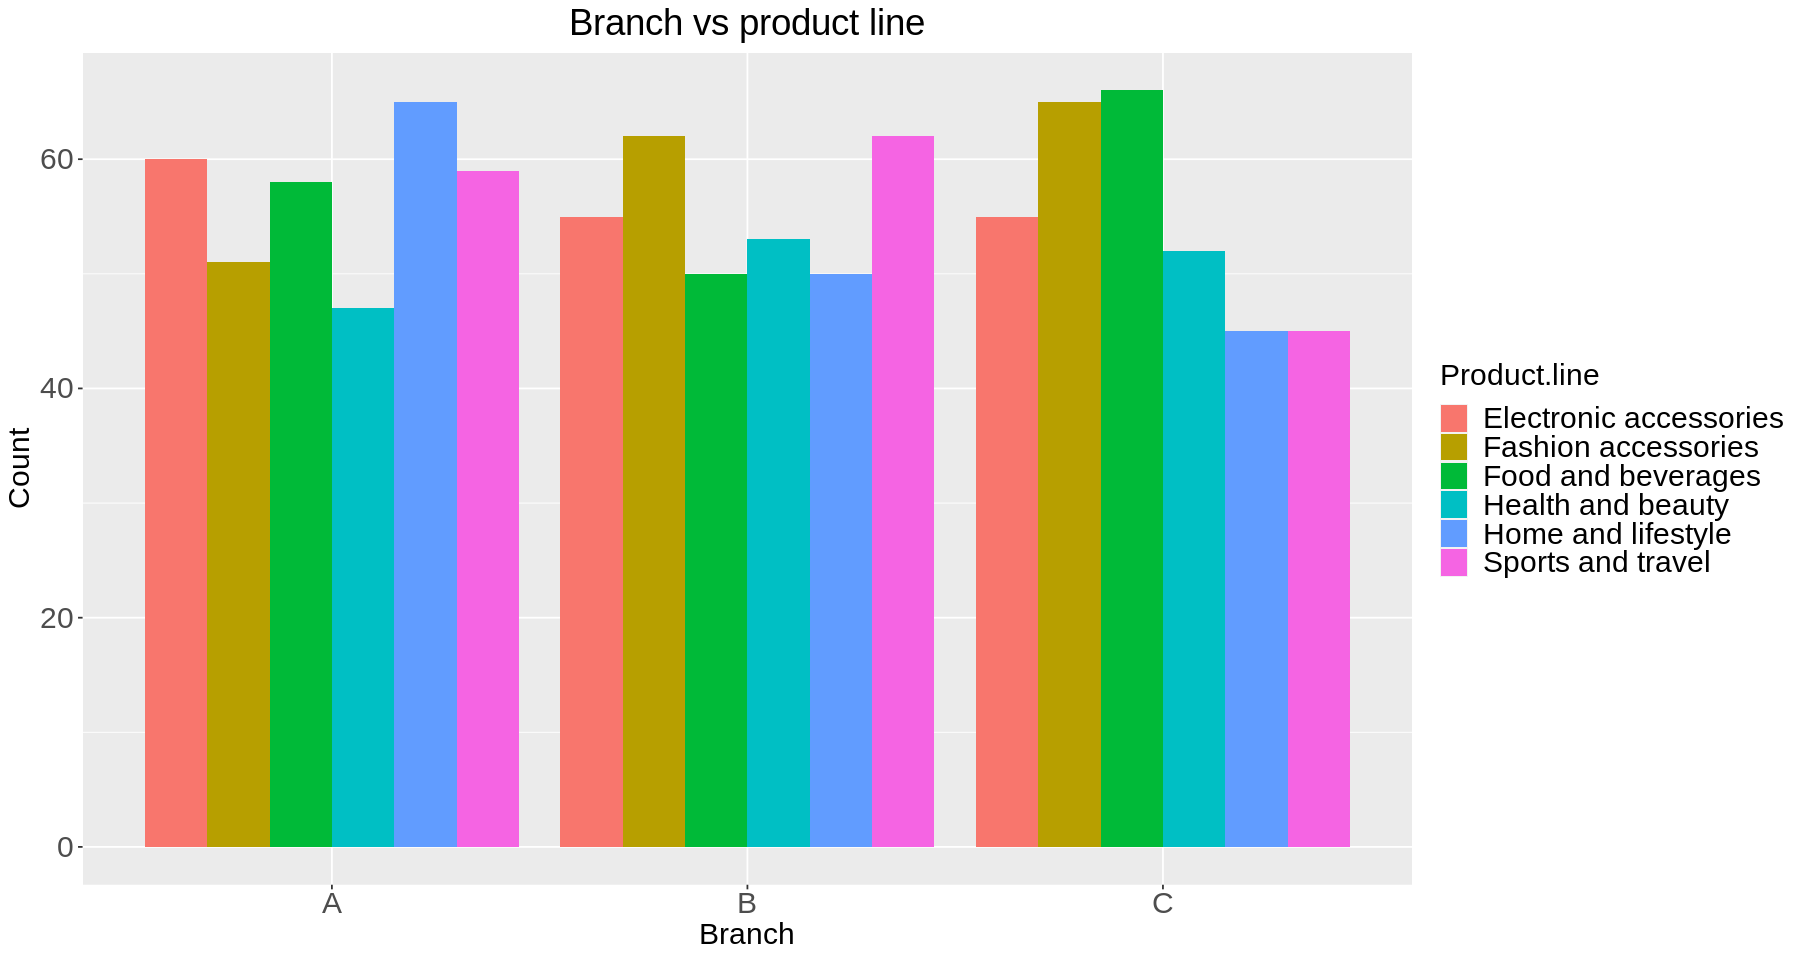

In [37]:
# Relationship between product line and branch

options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(df, aes(x = Branch, fill = Product.line)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Branch vs product line", x = "Branch", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

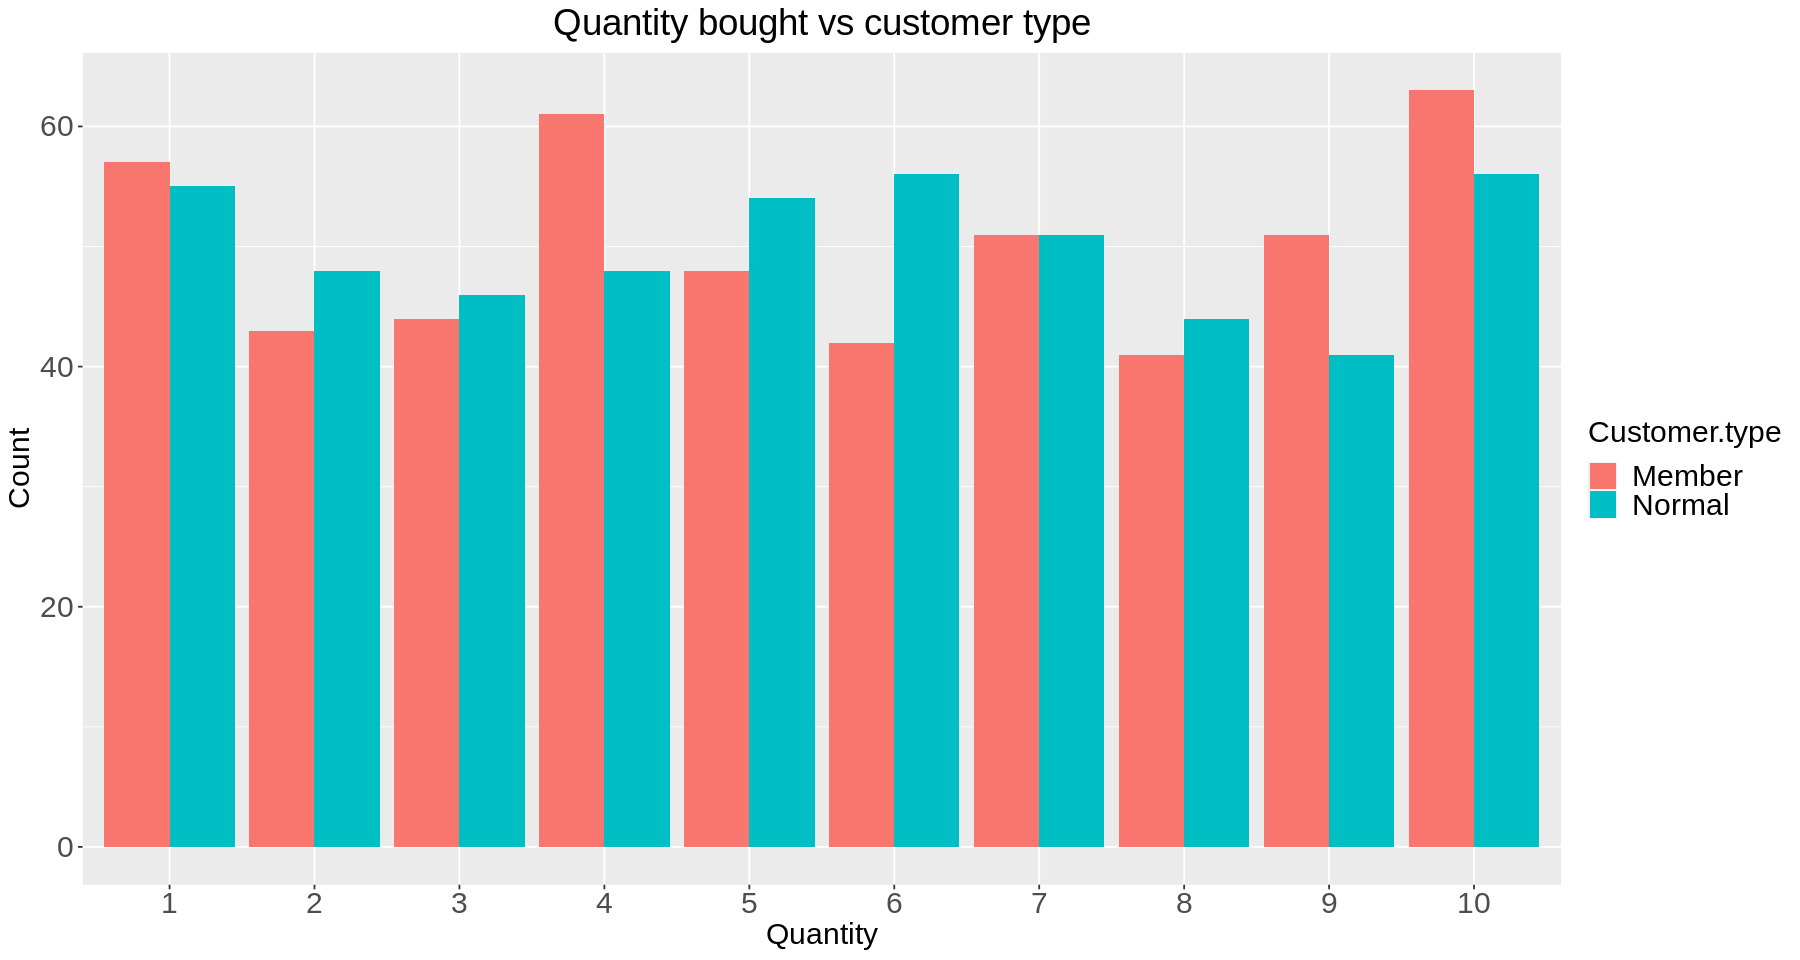

In [38]:
# Relationship between quantity bought and product type

options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(df, aes(x = Quantity, fill = Customer.type)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Quantity bought vs customer type", x = "Quantity", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

- Males bought more health and beauty products than females.
- Females made more purchases in fashion accessories, sports and travel and food and beverages product lines than males.
- In branch A most customers used the e-wallet while in branch C most customers used cash. Most customers in branch B used the e-wallet but an almost equivalent number used cash or credit card
- In branch A most customers bought home and lifestyle goods, in branch B most customers bought fashion accessories or sports and travel goods and in C most customers bought fashion accessories or food and beverages.
- Most member customers bought 10 or 4 items

## Multivariate Analysis

In [40]:
# Installing and loading package ggcorrplot

install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



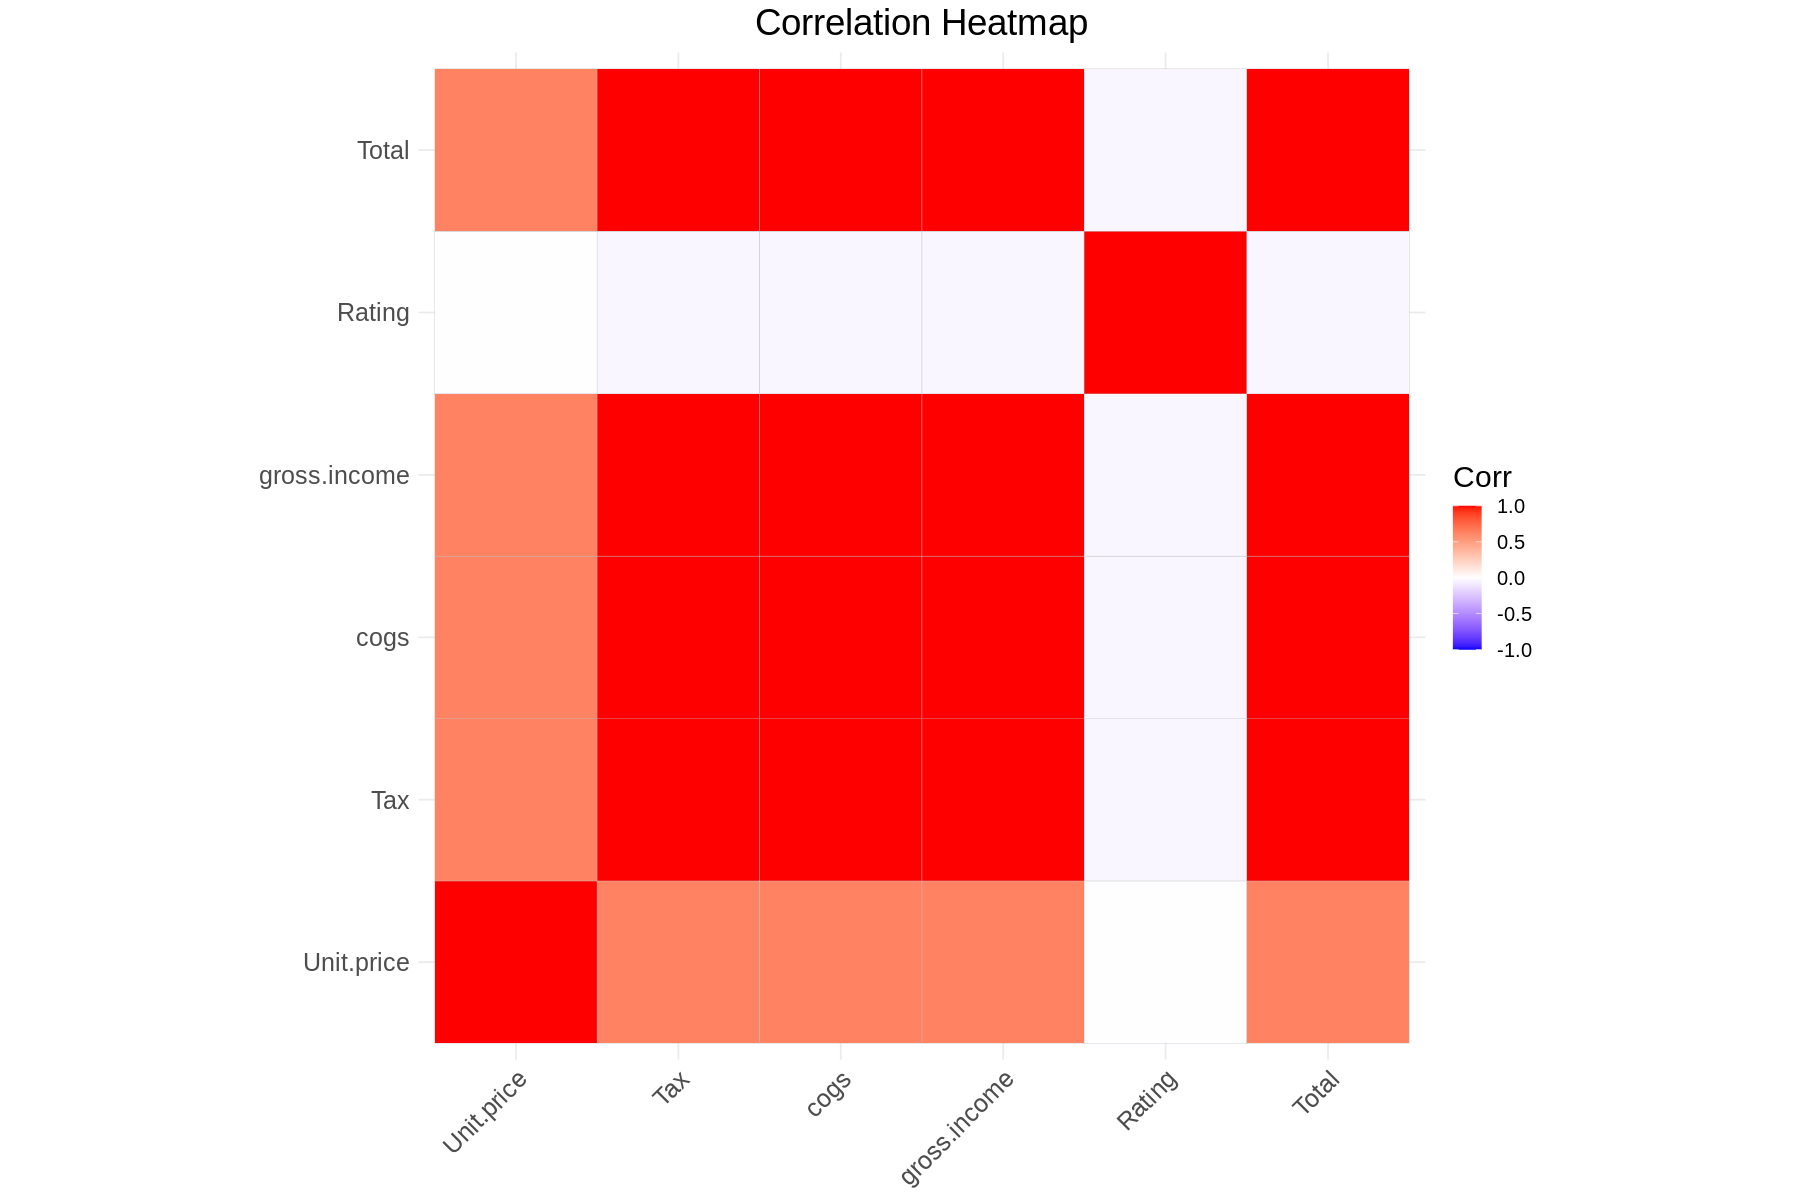

In [41]:
# Creating the correlation heatmap

options(repr.plot.width = 15, repr.plot.height = 10)
ggcorrplot(cor(df[, c(5,7,9,11:13)]), tl.cex = 15) + 
  labs(title = "Correlation Heatmap") +
    theme(axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=12))

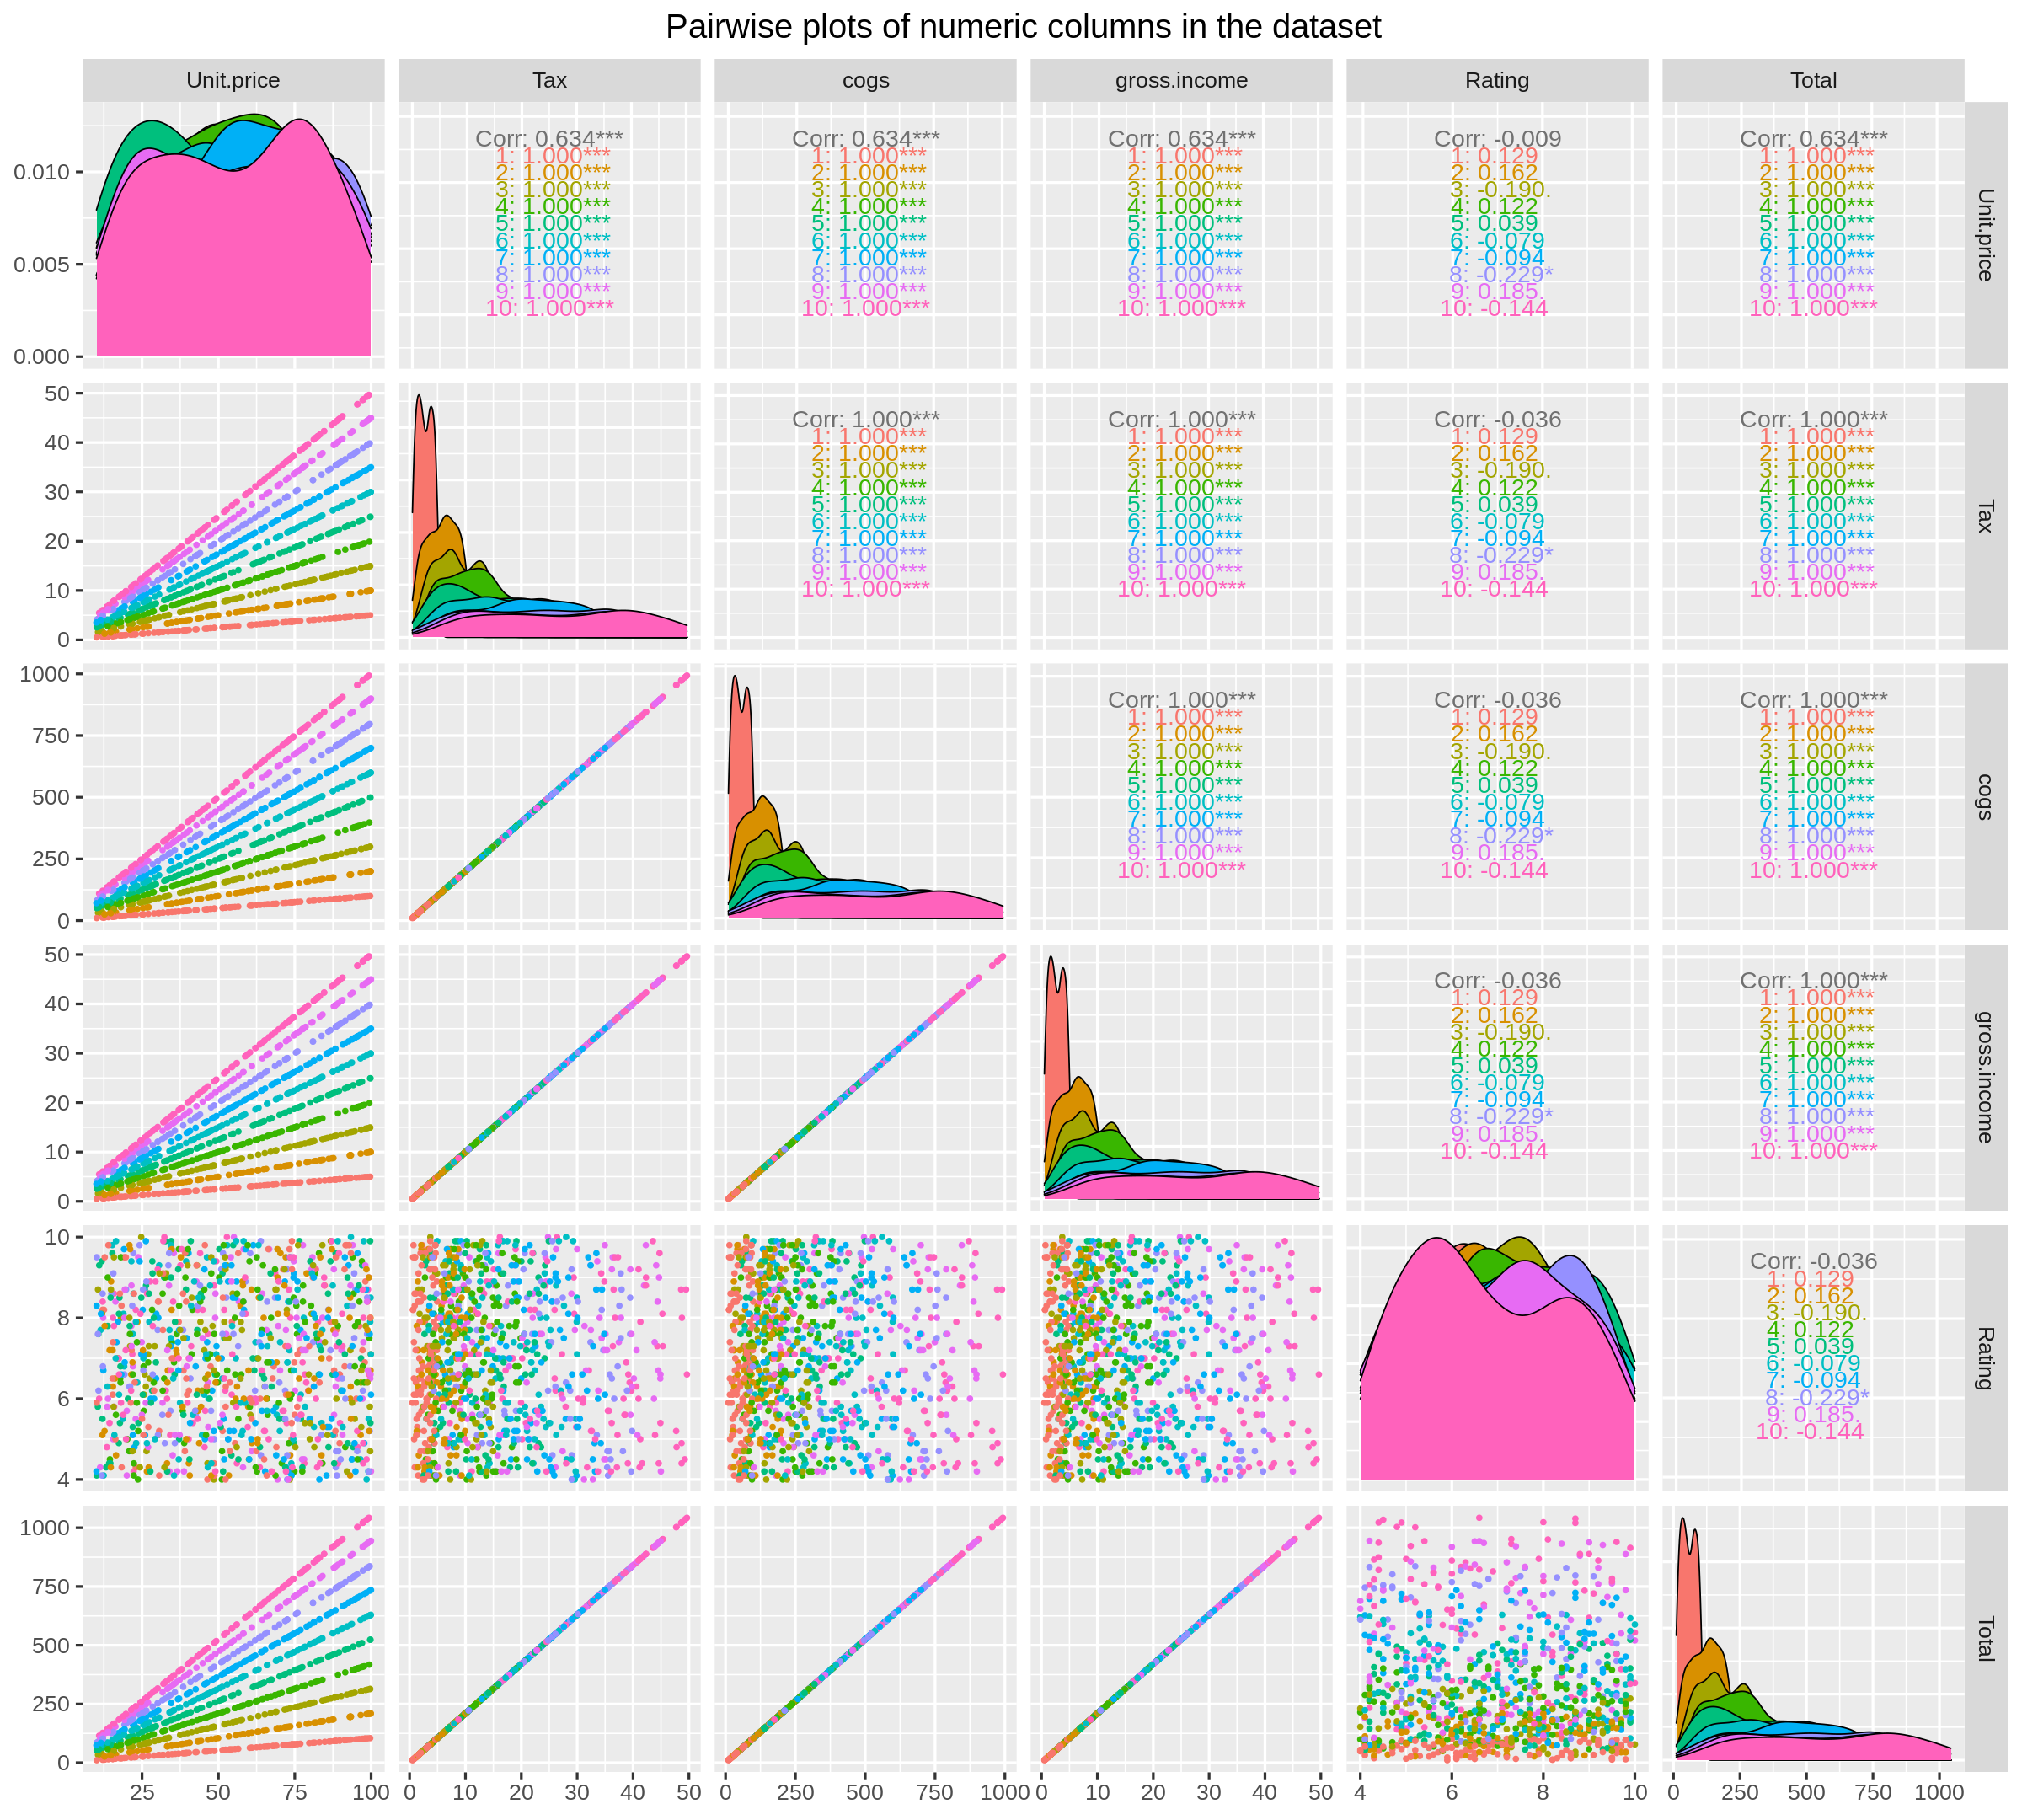

In [42]:
# Relationship between numerical variables and Quantity column

options(repr.plot.width = 20, repr.plot.height = 18)
ggpairs(df[, c(5,7,9,11:13)], aes(color = df$Quantity), upper = list(continuous = wrap("cor", size = 6))) + 
labs(title = "Pairwise plots of numeric columns in the dataset") +
    theme_grey(base_size = 20) +
    theme(plot.title = element_text(hjust = 0.5))

# 7. Implement the solution

## Feature Selection

### a) Filter Method

In [43]:
# Checking the structure of the columns

str(df)

'data.frame':	1000 obs. of  13 variables:
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : Factor w/ 10 levels "1","2","3","4",..: 7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total  

In [44]:
# Converting the Quantity column to integer

df$Quantity = as.integer(df$Quantity)
head(df)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [45]:
# Encoding the branch, customer type, Gender, Payment and quantity columns

df$Branch = ifelse(df$Branch == "A", 0,
                  ifelse(df$Branch == "B", 1,2))

df$Customer.type = ifelse(df$Customer.type == "Normal", 0, 1)
df$Gender = ifelse(df$Gender == "Male", 0, 1)
df$Payment = ifelse(df$Payment == "Cash", 0,
                  ifelse(df$Payment == "Credit card", 1,2))

df$Product.line = ifelse(df$Product.line == "Electronic accessories", 0,
            ifelse(df$Product.line == "Fashion accessories", 1,
            ifelse(df$Product.line == "Food and beverages", 2,
            ifelse(df$Product.line == "Health and beauty", 3,
            ifelse(df$Product.line == "Home and lifestyle", 4, 5)))))

head(df)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,3,74.69,7,26.1415,2,522.83,4.761905,26.1415,9.1,548.9715
2,2,0,1,0,15.28,5,3.8200,0,76.40,4.761905,3.8200,9.6,80.2200
3,0,0,0,4,46.33,7,16.2155,1,324.31,4.761905,16.2155,7.4,340.5255
4,0,1,0,3,58.22,8,23.2880,2,465.76,4.761905,23.2880,8.4,489.0480
5,0,0,0,5,86.31,7,30.2085,2,604.17,4.761905,30.2085,5.3,634.3785
6,2,0,0,0,85.39,7,29.8865,2,597.73,4.761905,29.8865,4.1,627.6165


In [47]:
# Installing and loading the caret and mlbench packages

install.packages("mlbench")
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
# Filtering the numerical columns

num = df[, c(5,7,9,11,12)]
head(num)

,Unit.price,Tax,cogs,gross.income,Rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,26.1415,522.83,26.1415,9.1
2,15.28,3.8200,76.40,3.8200,9.6
3,46.33,16.2155,324.31,16.2155,7.4
4,58.22,23.2880,465.76,23.2880,8.4
5,86.31,30.2085,604.17,30.2085,5.3
6,85.39,29.8865,597.73,29.8865,4.1


In [49]:
# Determining the correlated features

set.seed(5)

# calculate correlation matrix
correlationMatrix <- cor(num)

# find attributes that are highly corrected (ideally >0.75)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# print indexes of highly correlated attributes
names(num[, highlyCorrelated])

# The Tax, cogs are considered the redundant columns

[1] "Tax"  "cogs"

In [52]:
# Removing the redundant columns and gross percentage column

df2 = df[ , -c(7,9,10)]
head(df2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,3,74.69,7,2,26.1415,9.1,548.9715
2,2,0,1,0,15.28,5,0,3.8200,9.6,80.2200
3,0,0,0,4,46.33,7,1,16.2155,7.4,340.5255
4,0,1,0,3,58.22,8,2,23.2880,8.4,489.0480
5,0,0,0,5,86.31,7,2,30.2085,5.3,634.3785
6,2,0,0,0,85.39,7,2,29.8865,4.1,627.6165


### b) Feature Ranking

In [53]:
# Installing the library F selector

install.packages("FSelector")
library(FSelector)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘randomForest’, ‘RWeka’




In [54]:
# Feature ranking

Scores <- linear.correlation(Total~., df2)
Scores

,attr_importance
,<dbl>
Branch,0.04104666
Customer.type,0.01967028
Gender,0.04945099
Product.line,0.03162072
Unit.price,0.63396209
Quantity,0.70551019
Payment,0.01243364
gross.income,1.00000000
Rating,0.03644170


In [55]:
# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.

Subset2 <-cutoff.k.percent(Scores, 0.3)
as.data.frame(Subset2)

# Gross income, quantity and unit price are considered
# The most important feature in explaining sales

Subset2
<chr>
gross.income
Quantity
Unit.price


- I will only use the filter method for now for feature selection 

In [57]:
# Removing our label which is the total column

df3 = df2[, -10]
head(df3)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0,1,1,3,74.69,7,2,26.1415,9.1
2,2,0,1,0,15.28,5,0,3.8200,9.6
3,0,0,0,4,46.33,7,1,16.2155,7.4
4,0,1,0,3,58.22,8,2,23.2880,8.4
5,0,0,0,5,86.31,7,2,30.2085,5.3
6,2,0,0,0,85.39,7,2,29.8865,4.1


## PCA

In [58]:
# Scenario 1: Performing PCA after centering the dataset

sup.pca = prcomp(df3 , center = TRUE )
summary(sup.pca)

# By centering alone, 89.29% of information in the dataset can be encapsulated in the first Principle Component alone

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     27.6366 9.07753 1.73457 1.70018 1.19601 0.84418 0.80114
Proportion of Variance  0.8929 0.09634 0.00352 0.00338 0.00167 0.00083 0.00075
Cumulative Proportion   0.8929 0.98927 0.99278 0.99616 0.99784 0.99867 0.99942
                          PC8     PC9
Standard deviation     0.5072 0.48869
Proportion of Variance 0.0003 0.00028
Cumulative Proportion  0.9997 1.00000

In [59]:
# Scenario 2: Performong PCA after centering and scaling the dataset

sup.pca1 = prcomp(df3 , center = TRUE, scale = TRUE)
summary(sup.pca1)

# After centering and scaling the dataset, 21.85% of information in the dataset 
# can be encapsulated in the first Principle Component

Importance of components:
                          PC1    PC2   PC3    PC4    PC5    PC6    PC7    PC8
Standard deviation     1.4024 1.0623 1.031 1.0098 0.9929 0.9771 0.9625 0.9482
Proportion of Variance 0.2185 0.1254 0.118 0.1133 0.1095 0.1061 0.1029 0.0999
Cumulative Proportion  0.2185 0.3439 0.462 0.5753 0.6848 0.7909 0.8938 0.9937
                           PC9
Standard deviation     0.23779
Proportion of Variance 0.00628
Cumulative Proportion  1.00000

In [60]:
# Putting total into groups

df2$Total = ifelse(df2$Total >= 0 & df2$Total <= 200, "Low",
                  ifelse(df2$Total > 200 & df2$Total <= 600, "Medium", "High"))

head(df2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,0,1,1,3,74.69,7,2,26.1415,9.1,Medium
2,2,0,1,0,15.28,5,0,3.8200,9.6,Low
3,0,0,0,4,46.33,7,1,16.2155,7.4,Medium
4,0,1,0,3,58.22,8,2,23.2880,8.4,Medium
5,0,0,0,5,86.31,7,2,30.2085,5.3,High
6,2,0,0,0,85.39,7,2,29.8865,4.1,High


In [61]:
# Changing the total column into a factor

df2$Total = as.factor(df2$Total)
str(df2)

'data.frame':	1000 obs. of  10 variables:
 $ Branch       : num  0 2 0 0 0 2 0 2 0 1 ...
 $ Customer.type: num  1 0 0 1 0 0 1 0 1 1 ...
 $ Gender       : num  1 1 0 0 0 0 1 1 1 1 ...
 $ Product.line : num  3 0 4 3 5 0 0 4 3 2 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Payment      : num  2 0 1 2 2 2 2 2 1 1 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : Factor w/ 3 levels "High","Low","Medium": 3 2 3 3 1 1 3 1 2 2 ...


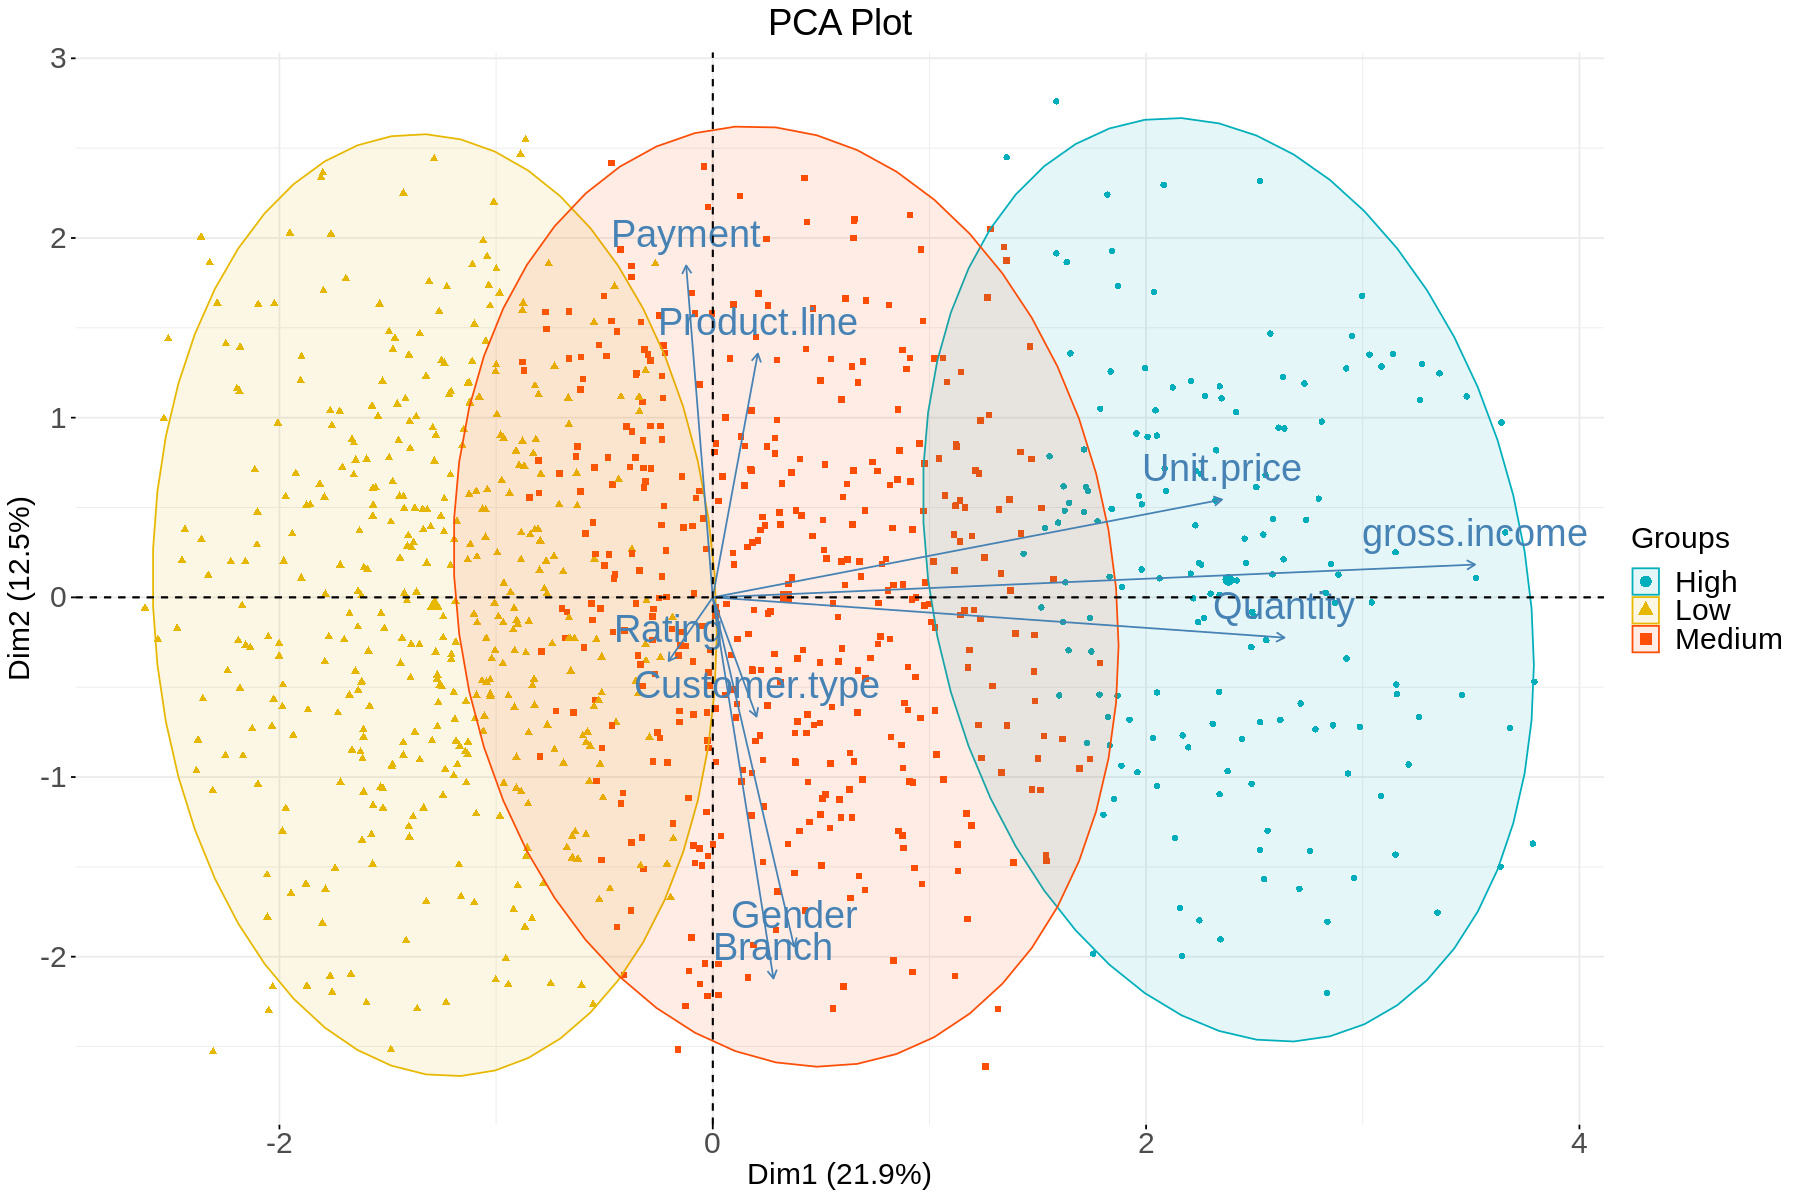

In [64]:
# Plotting the 1st 2 Principal Components using scenario 2
# Grouping by the level of sales

options(repr.plot.width = 15, repr.plot.height = 10)
fviz_pca_biplot(sup.pca1,
             geom.ind = "point",
             col.ind = df2$Total,
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, 
             legend.title = "Groups",
             labelsize = 8,
              label = "var",
             )+ ggtitle("PCA Plot") +
             theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22),
              legend.title = element_text(size=18),
              legend.text = element_text(size=18))

In [66]:
str(df2)

'data.frame':	1000 obs. of  10 variables:
 $ Branch       : num  0 2 0 0 0 2 0 2 0 1 ...
 $ Customer.type: num  1 0 0 1 0 0 1 0 1 1 ...
 $ Gender       : num  1 1 0 0 0 0 1 1 1 1 ...
 $ Product.line : num  3 0 4 3 5 0 0 4 3 2 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Payment      : num  2 0 1 2 2 2 2 2 1 1 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : Factor w/ 3 levels "High","Low","Medium": 3 2 3 3 1 1 3 1 2 2 ...


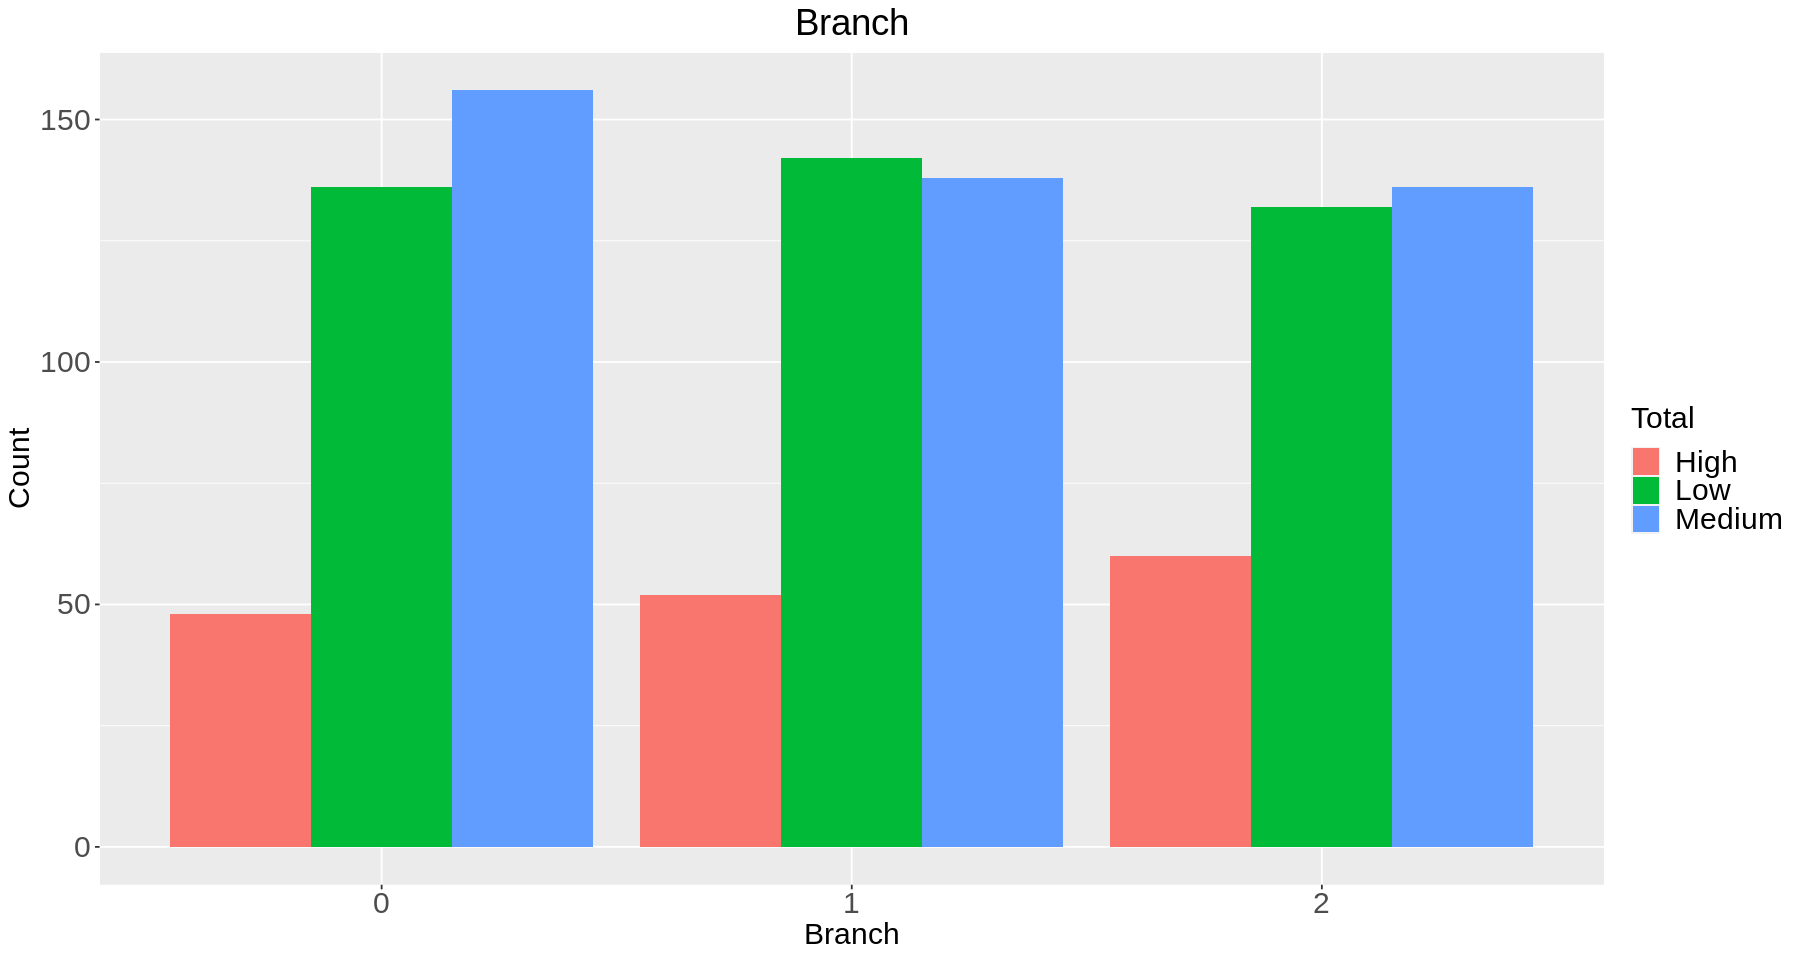

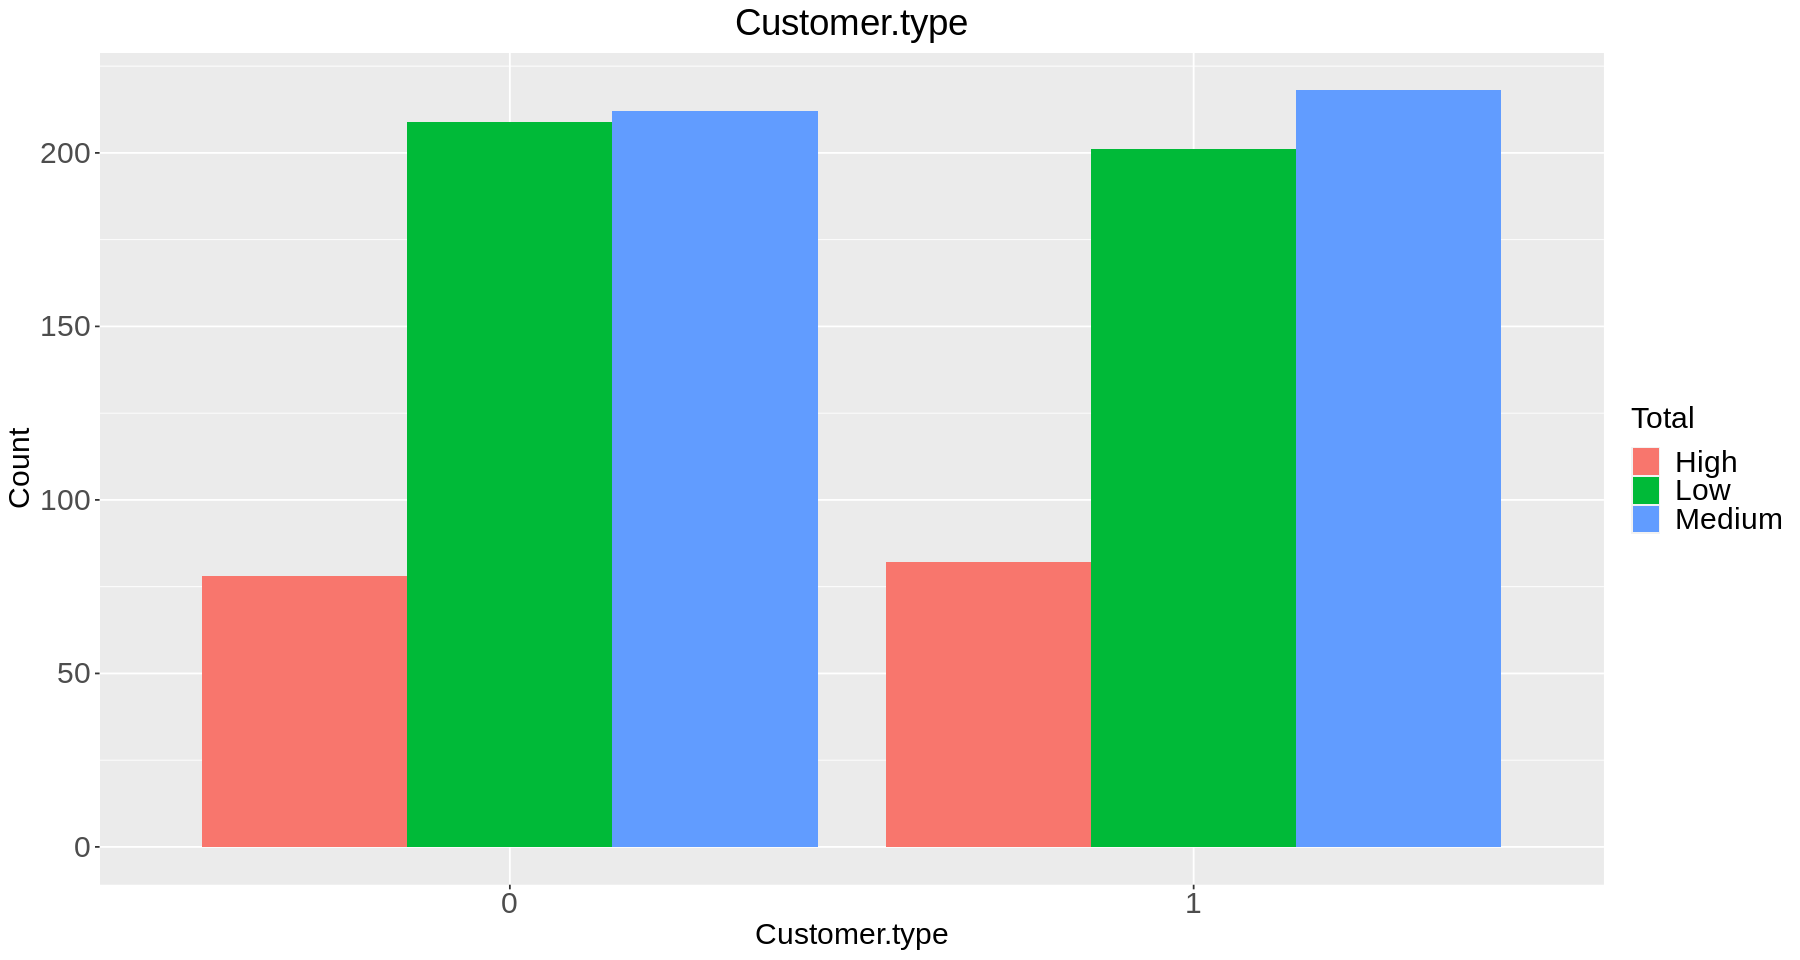

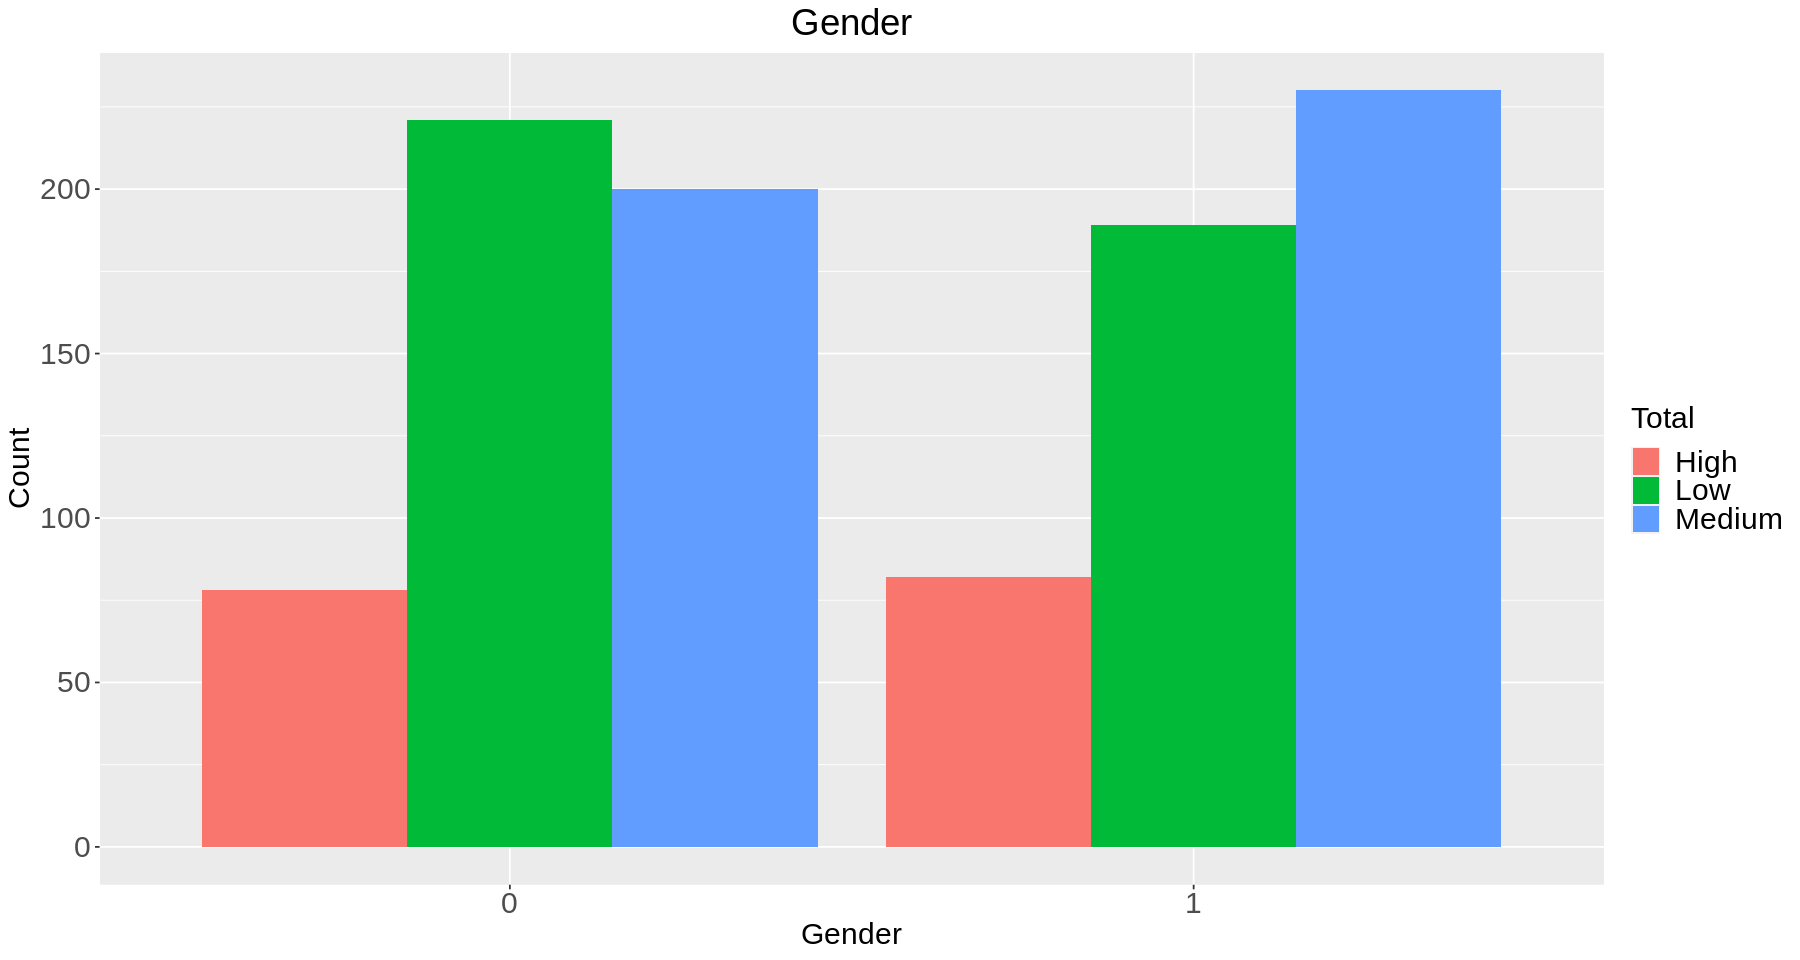

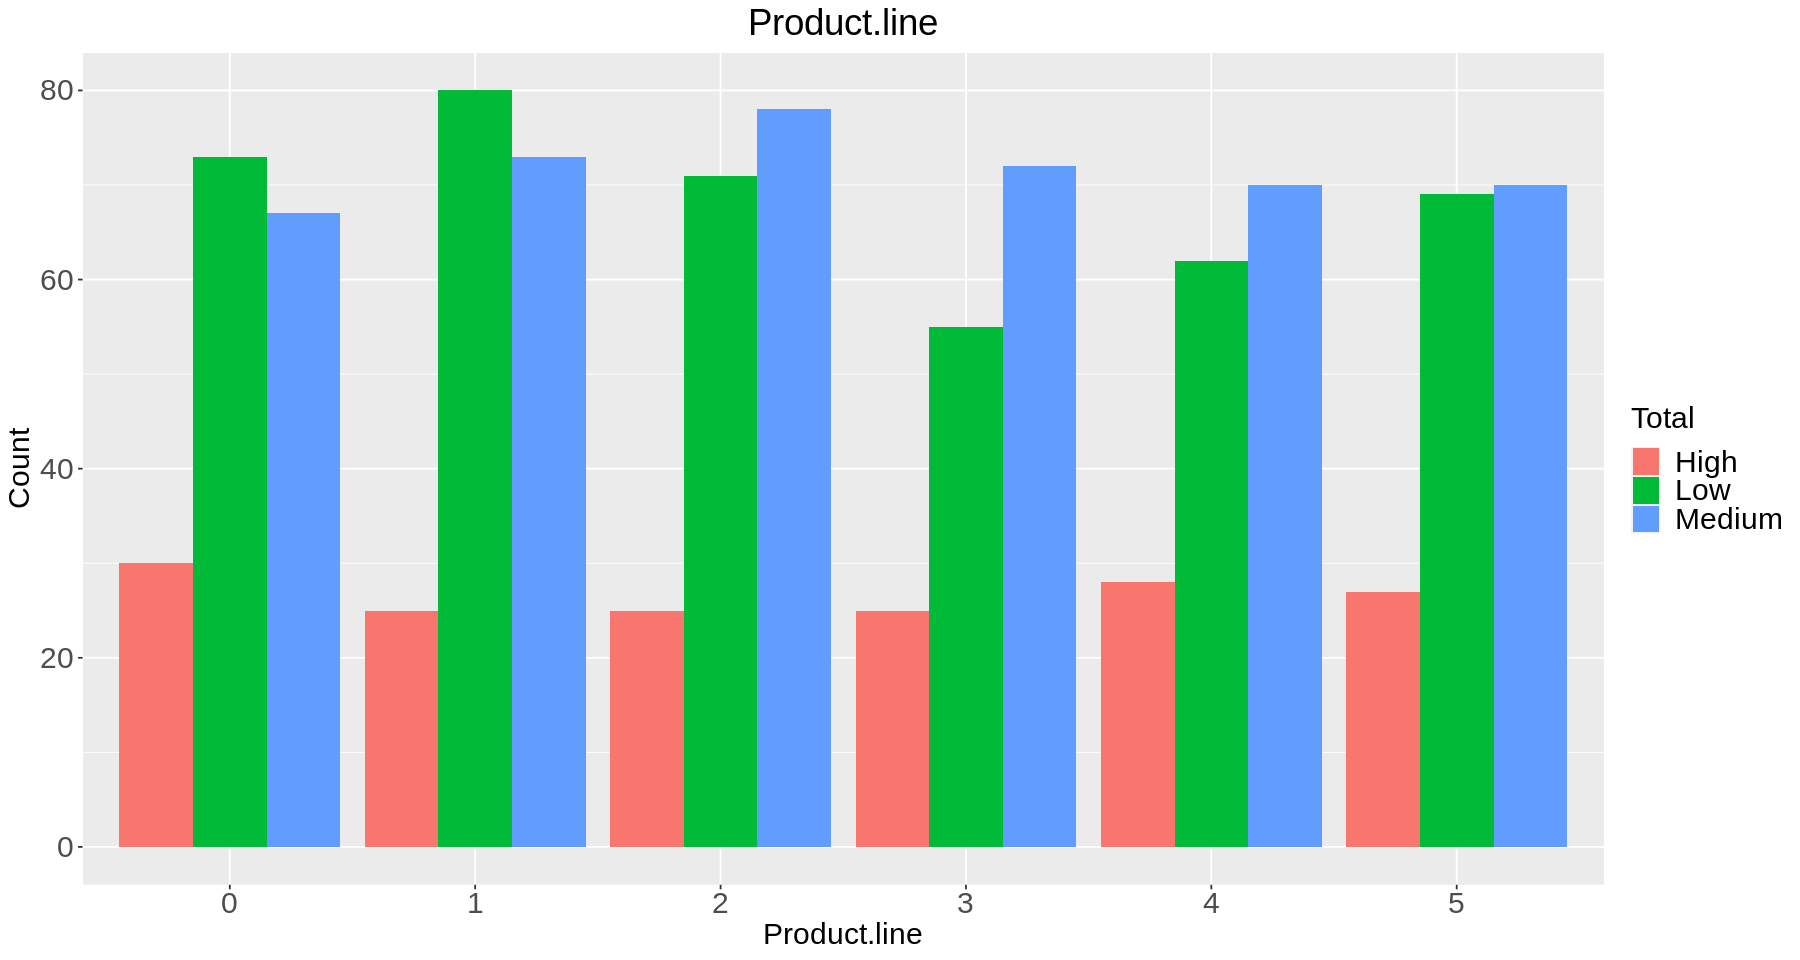

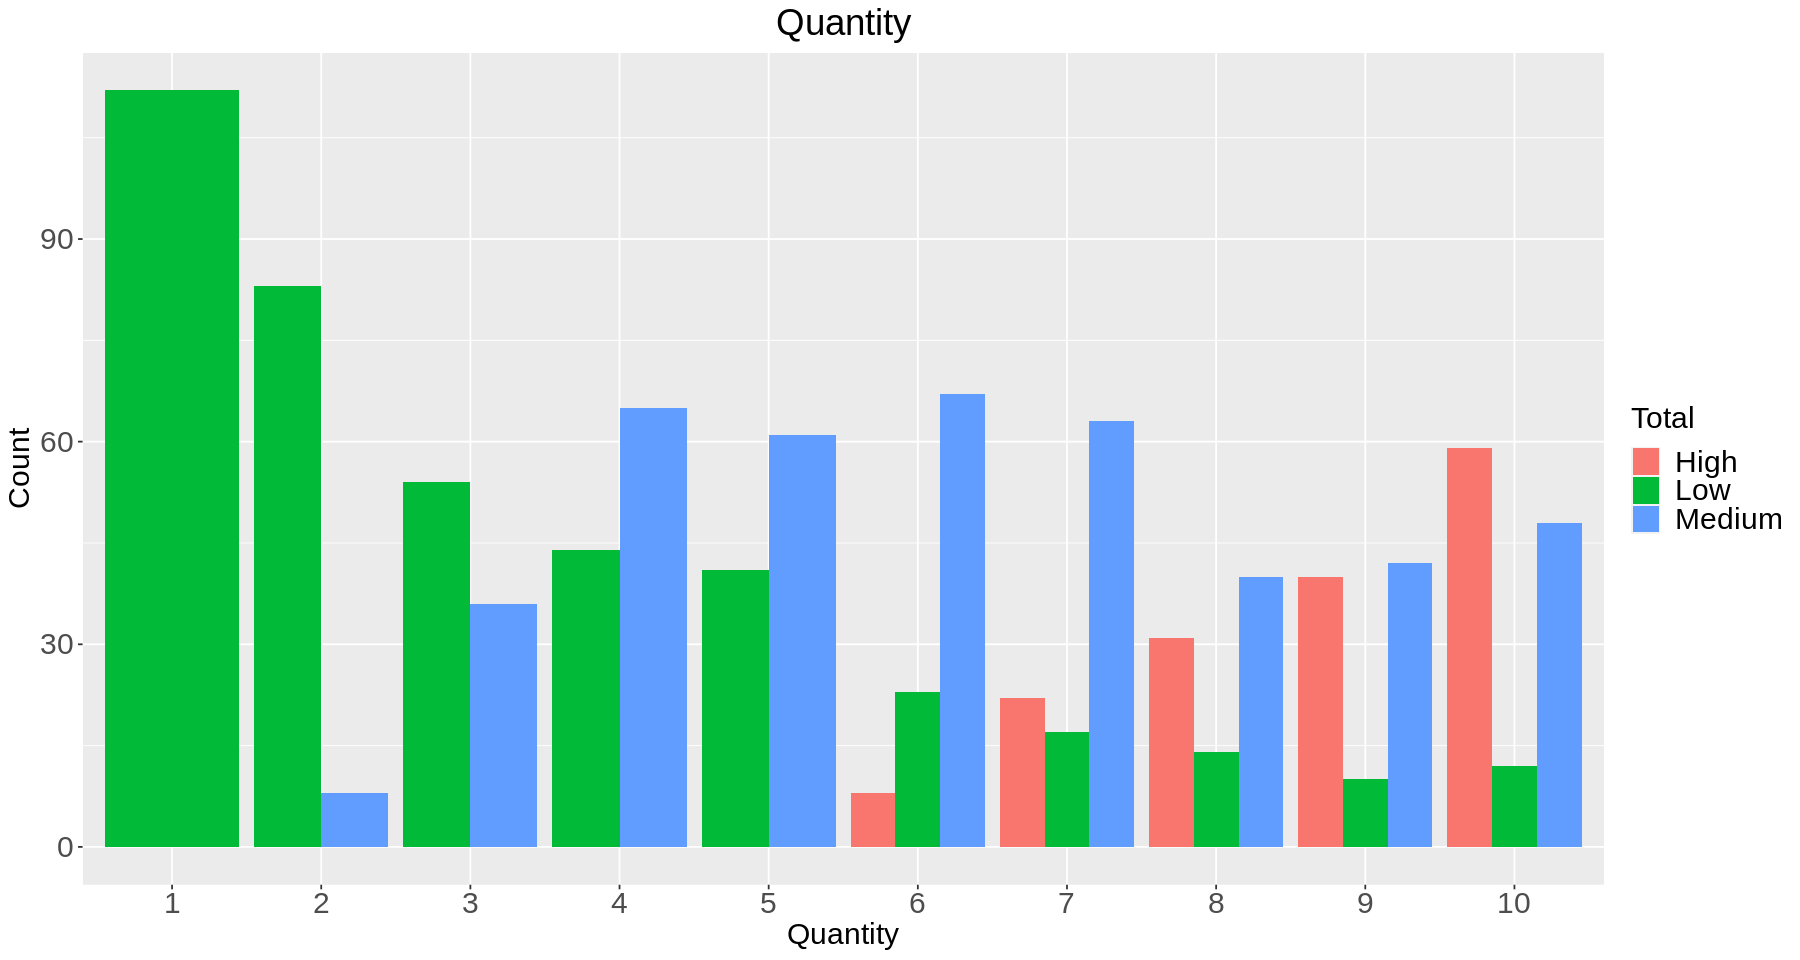

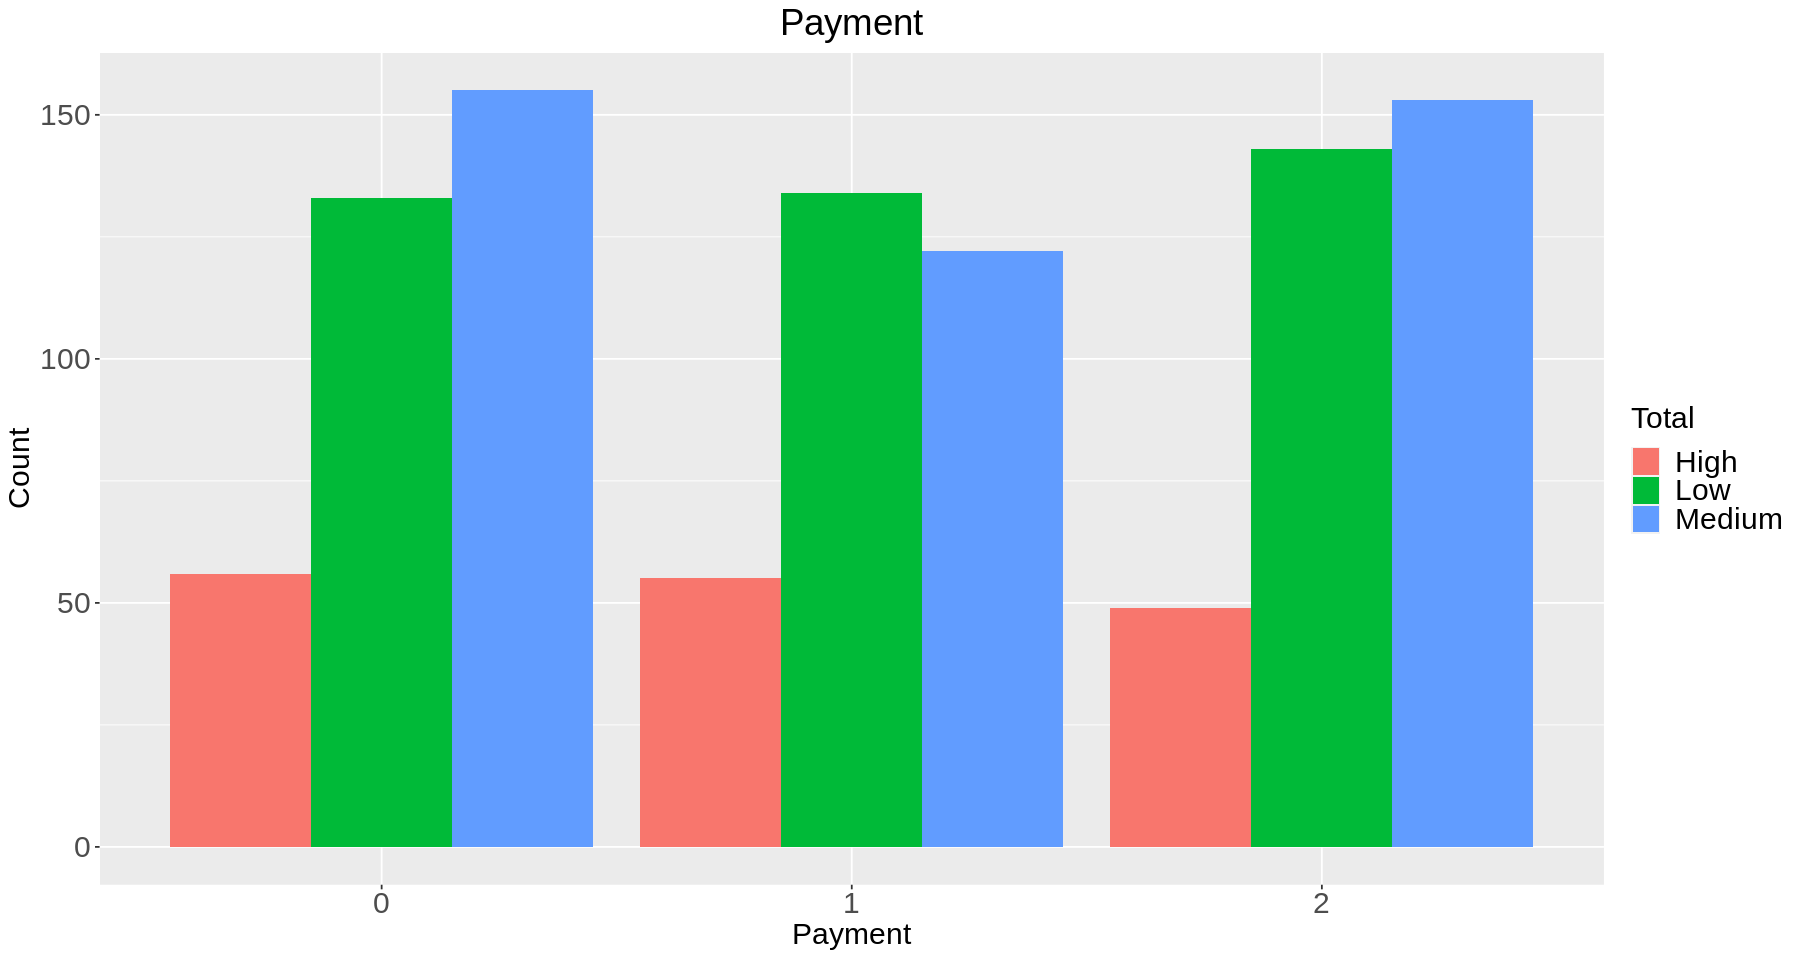

In [82]:
# EDA on the new findings
# Plotting the categorical columns against the total category

cat1 = df2[, -c(5,8,9,10)]
for (i in 1:length(cat1)) {
  options(repr.plot.width = 15, repr.plot.height = 8)
  print(ggplot(df2, aes(x = factor(cat1[,i]), fill = Total)) + 
    geom_bar(position = "dodge") + 
    labs(title = names(cat1[i]), x = names(cat1[i]), y = "Count") +
      theme(axis.text = element_text(size=18),
            axis.title = element_text(size = 18),
            plot.title = element_text(hjust = 0.5, size = 22),
            legend.title = element_text(size=18),
            legend.text = element_text(size=18)))
  cat("\n", "\n")
}

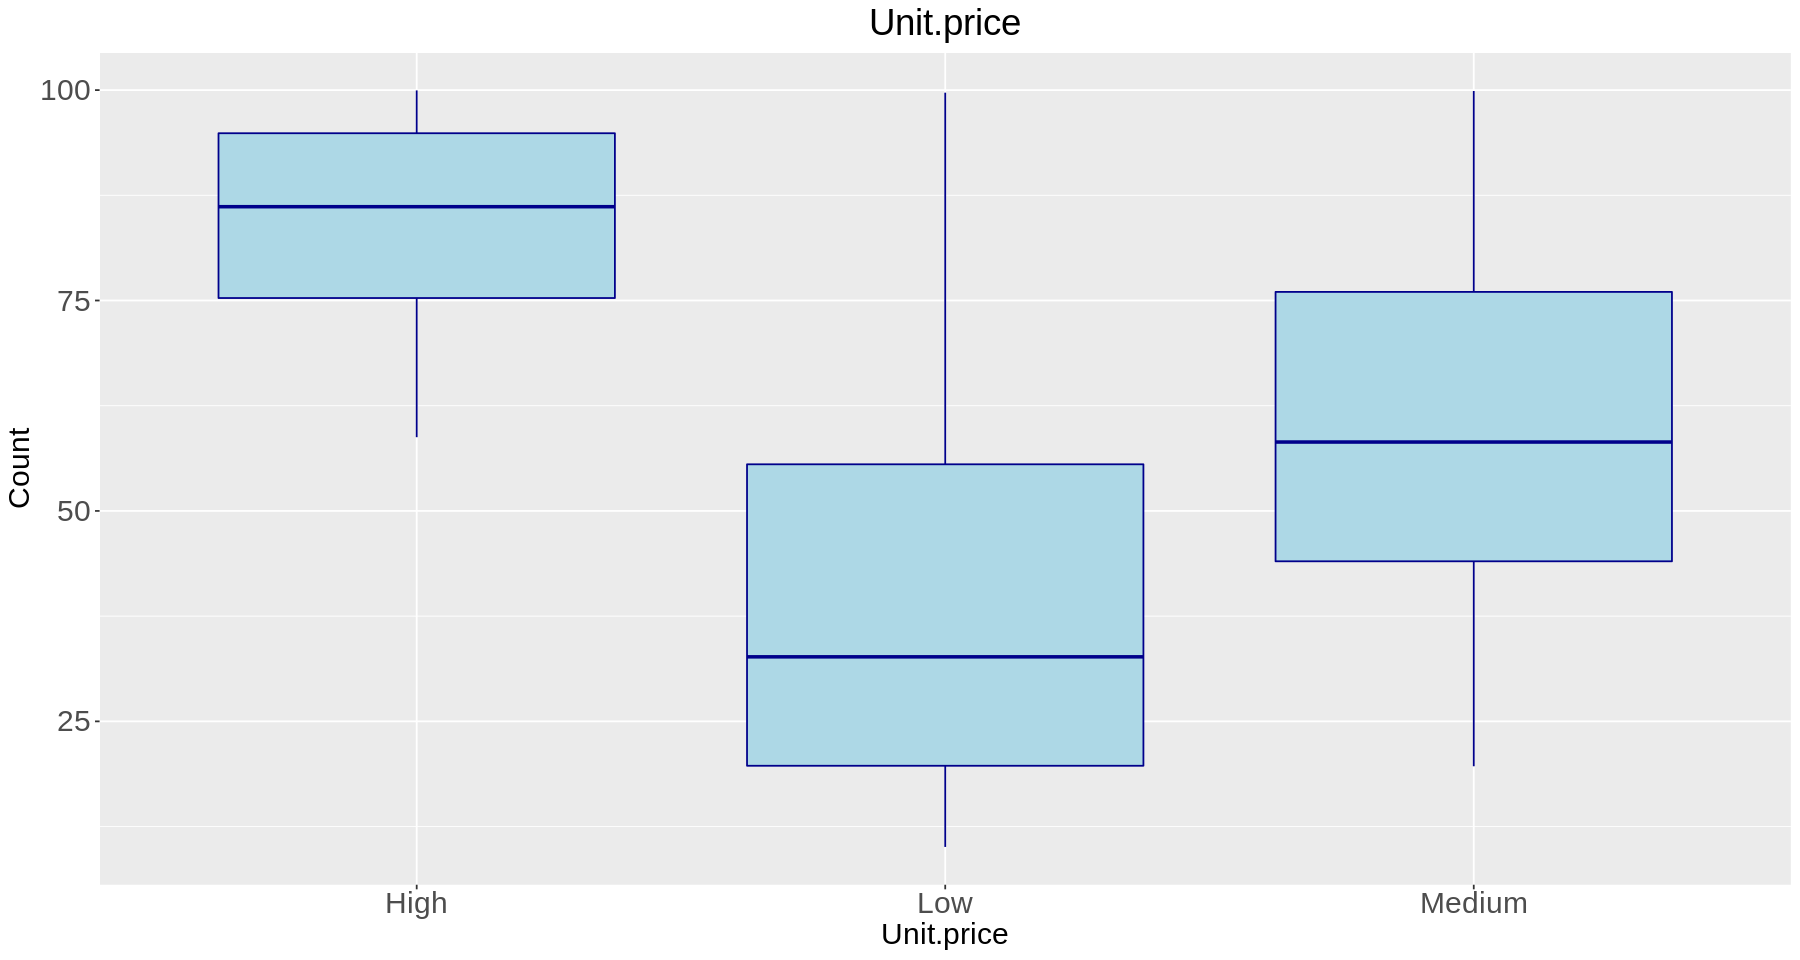

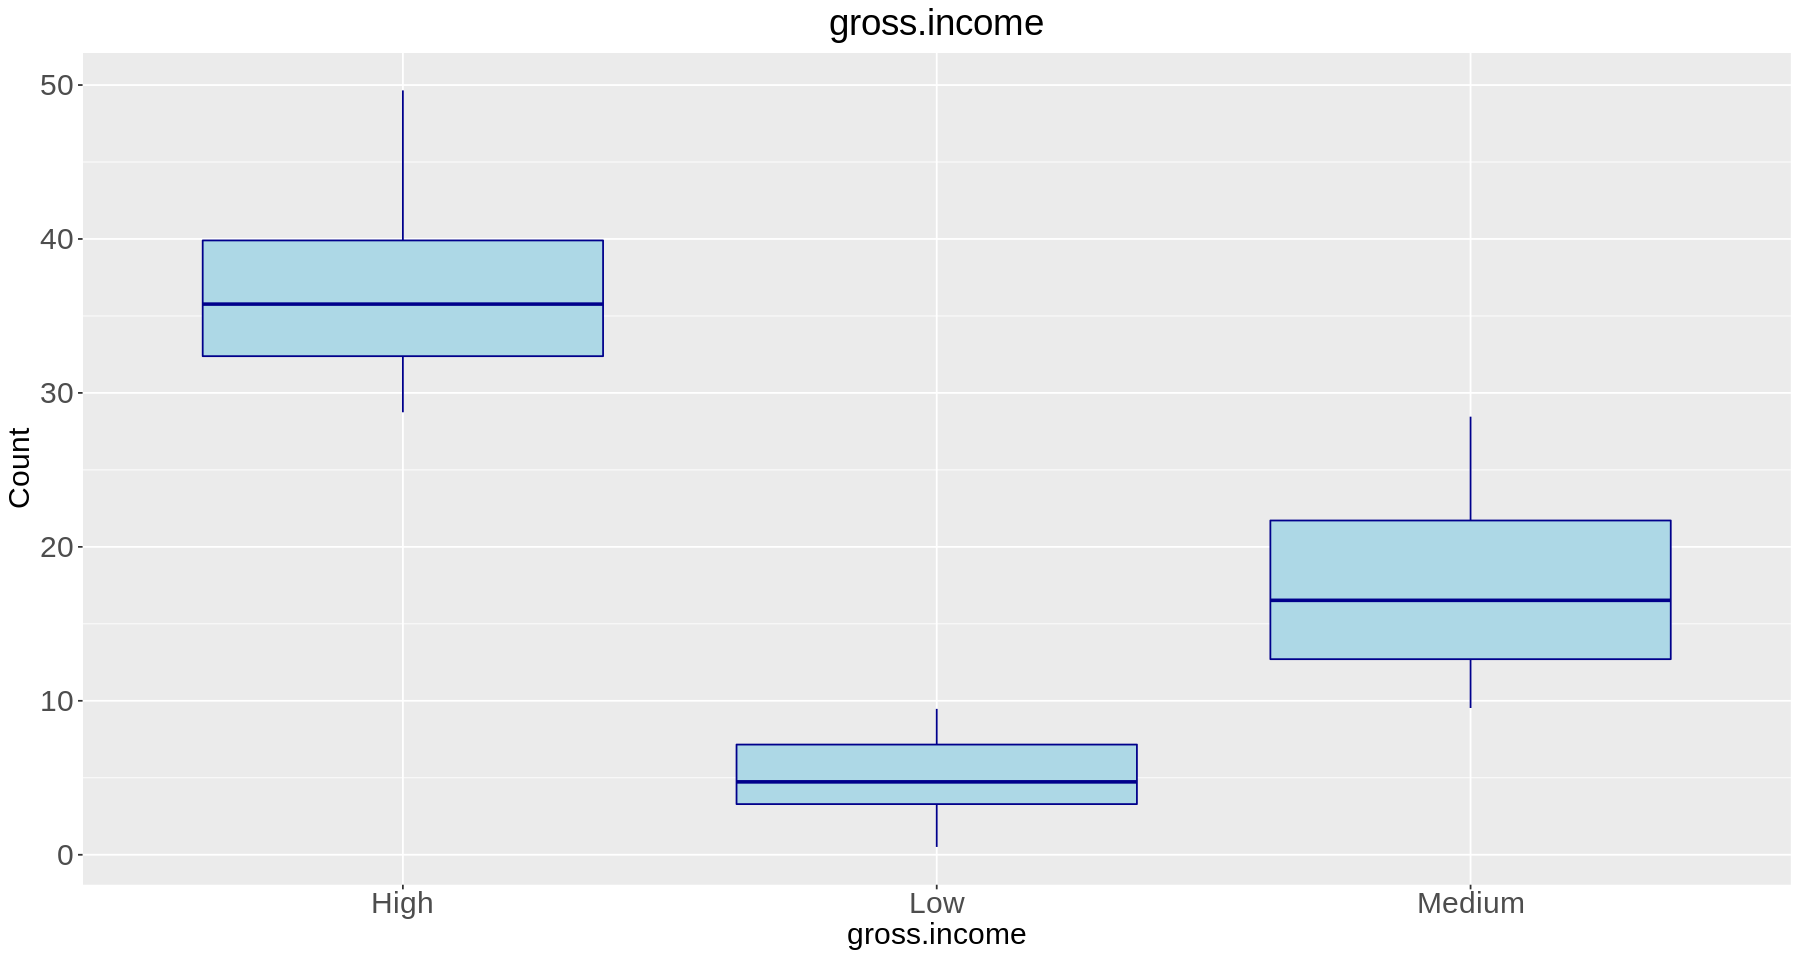

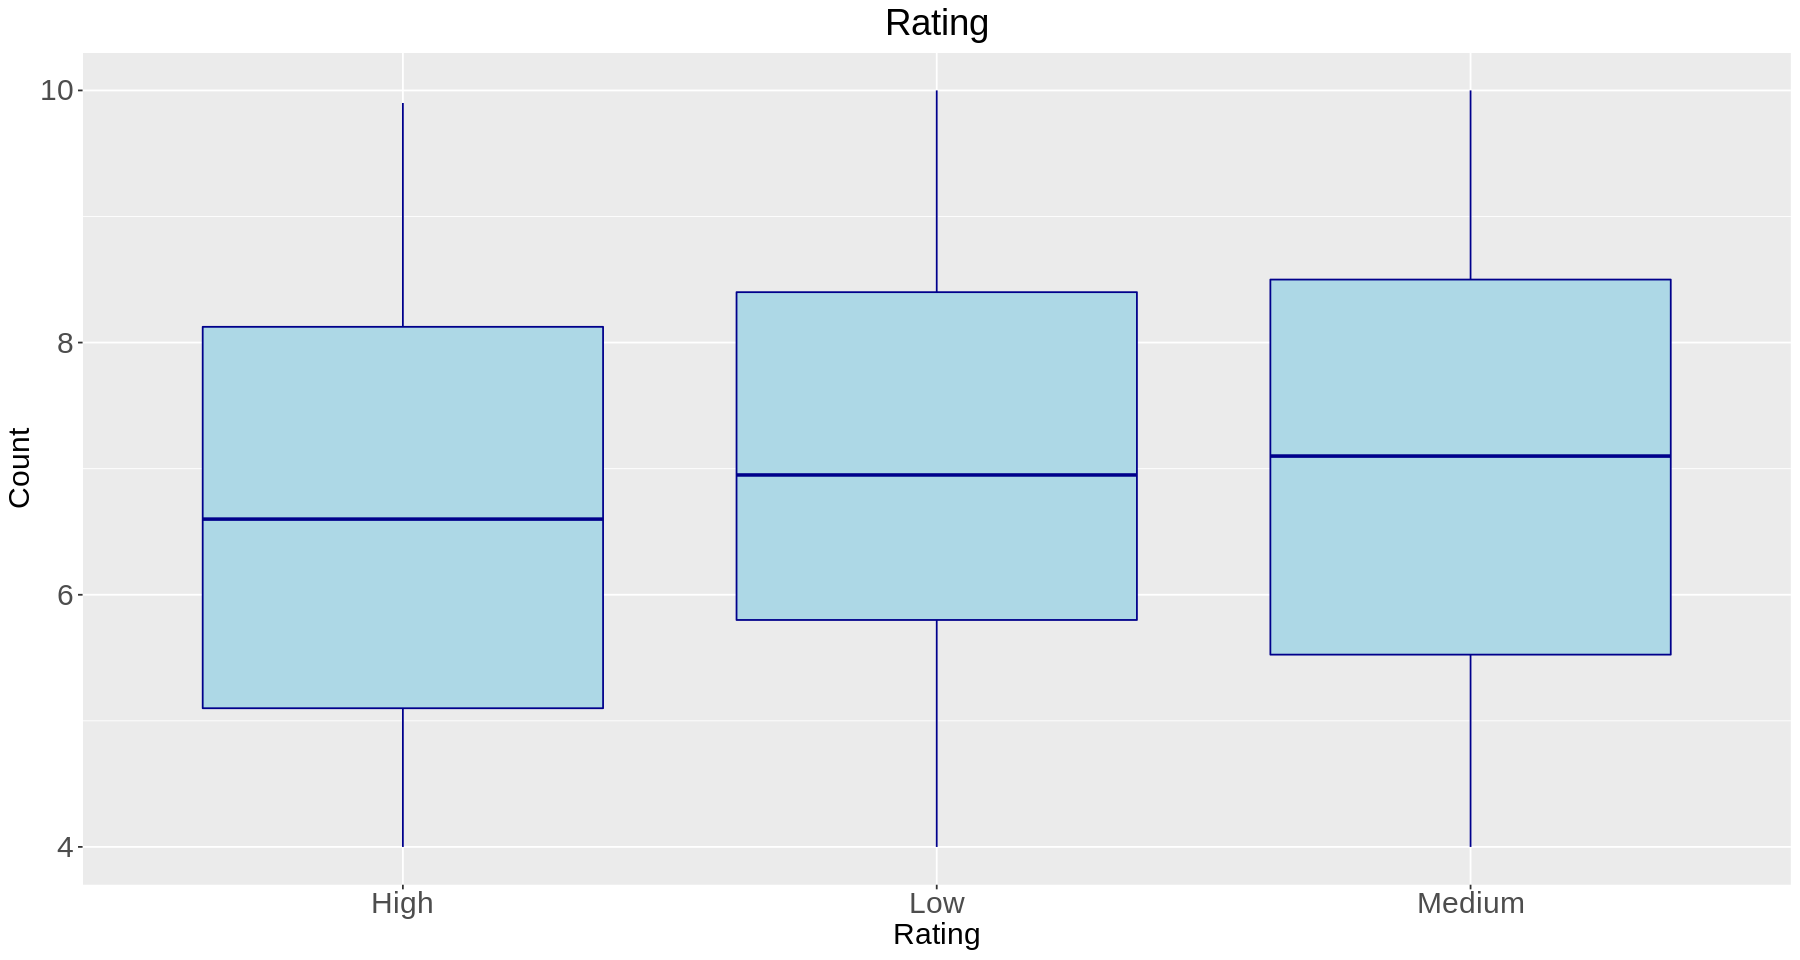

In [81]:
# Comaring the numerical columns and Class column

cat1 = df2[, c(5,8,9)]
for (i in 1:length(cat1)) {
  options(repr.plot.width = 15, repr.plot.height = 8)
  print(ggplot(df2, aes(x= Total, y = cat1[,i])) + 
    geom_boxplot(color="darkblue", fill="lightblue") + 
    labs(title = names(cat1[i]), x = names(cat1[i]), y = "Count") +
      theme(axis.text = element_text(size=18),
            axis.title = element_text(size = 18),
            plot.title = element_text(hjust = 0.5, size = 22),
            legend.title = element_text(size=18),
            legend.text = element_text(size=18)))
  cat("\n", "\n")
}

# 8. Insights

The insights that can be made from the PCA analysis are as follows:

- Unit price, quantity and gross income factors contribute the most to the high sales cluster
- Customers recording high sales tend to have high gross incomes, buy things in bulk and buy items with a high unit price.

- Factors that contribute the most to the middle cluster are Payment, Gender, Branch and Product line

- Those from medium sales group buy more from branch A.

- More females contribute to sales in the medium sales class than males. However, more males contribute to the low sales class than women.

- Customers in the medium sales class buy more goods in the food and bevarages product line while customers in the low sales class buy most goods in the fashion product line. 

- Customers contributing least to sales used e-wallet the most. Those in the medium sales class used cash the least.

- Rating did not vary much with the different sales classes.

# 9. Recommendations

In light of the above insights, the following recommendations can be made:

- Include products that are in the higher price range to maximize sales from those who like to buy more expensive and presumably higher quality products.

- Offer promotions that attract customers who like to buy their goods in bulk. 

- The company could also offer rewards for using certain payment methods or buying certain products. This would be great incentive to have people buy more.